<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/modelos2_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


## **Explicación de las pruebas a realizar**

En principio se imputaron todas las variables que podrían servir para este proyecto. Esto se hizo con el fin de probar todos los modelos posibles  que permiten resolver el problema. Como el dataset ya tenía faltantes, sobre todo en lo que tiene que ver con los resultados de laboratorio, se podría haber aprovechado esto para hacer las pruebas por etapas, pero limita la cantidad de modelos a utilizar, ya que algunos no soportan faltantes. Según los resultados que se obtengan y los modelos que mejor funcionan, se podría realizar esta prueba o no.

Como primera etapa, se entrenarán los modelos con el dataset completo. Según los resultados obtenidos, se procederá a realizar las pruebas por etapas, es decir, entrenamiento con parte del dataset (datos básicos del paciente) y después con el dataset completo.

In [3]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,act_vigorosa,...,act_moderada_9.0,prediabetes_glucosa_alterada_2.0,prediabetes_glucosa_alterada_3.0,prediabetes_glucosa_alterada_9.0,ACV_2,ACV_9,colesterol_alto_2.0,colesterol_alto_9.0,riñones_debiles_fallando_2.0,riñones_debiles_fallando_9.0
0,0.252775,1,0.836629,-0.748731,0.196637,0.547785,0.950983,1,-0.455568,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.541345,0.316824,1.472516,1.638509,0.256324,1,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.434103,1,-1.184465,0.695195,-0.744743,-0.095810,1.288207,0,-0.455568,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517088,-0.239514,0.123914,0.168128,-0.065207,0,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.366015,1,0.350266,0.447201,-0.745748,-0.982146,1.606888,0,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,bmi,fumo_100_cigarrillos,fumador_actual,act_vigorosa,...,act_moderada_9.0,prediabetes_glucosa_alterada_2.0,prediabetes_glucosa_alterada_3.0,prediabetes_glucosa_alterada_9.0,ACV_2,ACV_9,colesterol_alto_2.0,colesterol_alto_9.0,riñones_debiles_fallando_2.0,riñones_debiles_fallando_9.0
0,-0.422269,1,-0.356620,-0.493765,0.273615,-0.209254,1.140880,0,-0.455568,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136219,0.754733,0.060190,-0.128435,0.371970,1,2.364585,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.491089,0,-2.061674,-0.576858,-1.404786,-0.304637,-0.744758,1,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.096581,0,-1.827049,0.927919,-1.339257,-1.211241,0.091300,1,-0.455568,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276625,-0.661818,0.809700,-0.689028,1.871296,0,-0.455568,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   bmi                                    4454 non-null   float64
 7   fumo_100_cigarrillos                   4454 non-null   int64  
 8   fumador_actual                         4454 non-null   float64
 9   act_vigorosa                           4454 non-null   int64  
 10  realiza_actividad_intensidad_moderada  4454 non-null   int64  
 11  hora

In [6]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

In [7]:
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

columnas_eliminadas = ['raza_origen_7','act_caminar_bici_2.0','act_caminar_bici_9.0','act_moderada_2.0','act_moderada_9.0',
                       'raza_origen_1','raza_origen_2', 'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto_2.0',
                       'colesterol_alto_9.0', 'ancho_distribucion_globulos','fam_asma_2.0', 'fam_asma_9.0',
                       'glicohemoglobina','fumo_100_cigarrillos','realiza_actividad_intensidad_moderada',
                       'consumo_excesivo_alcohol_ultimo_año']

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   bmi                                    4454 non-null   float64
 7   fumador_actual                         4454 non-null   float64
 8   act_vigorosa                           4454 non-null   int64  
 9   horas_suenio                           4454 non-null   float64
 10  anhedonia                              4454 non-null   float64
 11  hemo

In [8]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [9]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(
    modelo,
    X_train, y_train,
    X_test, y_test,
    threshold=0.25,
    nombre="Modelo"
):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} =====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    auc_gap = auc_train - auc_test
    print(f"\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_gap:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()

    return {
        "auc_train": auc_train,
        "recall_train": recall_train,
        "precision_train": precision_train,
        "f1_train": f1_train,
        "auc_test": auc_test,
        "recall_test": recall_test,
        "precision_test": precision_test,
        "f1_test": f1_test,
        "auc_gap": auc_gap
    }


In [10]:
# Inicializamos la lista para almacenar los resultados de los modelos
results = []

Antes SMOTE:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    4032
1    2016
Name: count, dtype: int64

===== Random Forest + SMOTE =====
---- TRAIN ----
AUC: 0.9591
Recall: 0.9489
Precision: 0.6803
F1: 0.7925

---- TEST ----
AUC: 0.8520
Recall: 0.7905
Precision: 0.2594
F1: 0.3906

---- GAP (Train-Test) ----
AUC gap: 0.1071


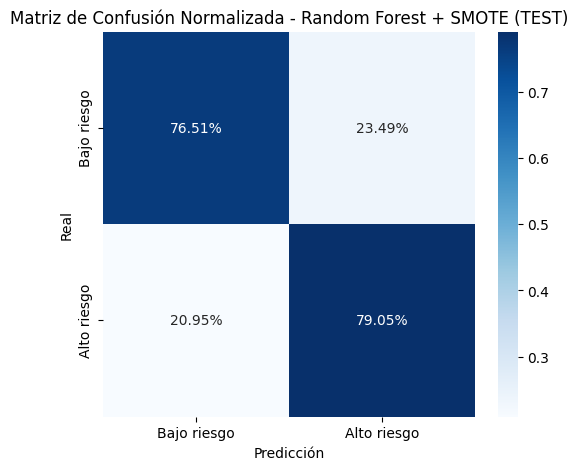


Métricas de Random Forest + SMOTE capturadas: {'auc_train': np.float64(0.9590544985355254), 'recall_train': 0.9489087301587301, 'precision_train': 0.680298719772404, 'f1_train': 0.7924606462303231, 'auc_test': np.float64(0.85199867855963), 'recall_test': 0.7904761904761904, 'precision_test': 0.259375, 'f1_test': 0.3905882352941176, 'auc_gap': np.float64(0.10705581997589542)}


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Oversampling
smote = SMOTE(
   sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)

# Capturamos las métricas devueltas por la función modificada
rf_smote_metrics = evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Random Forest + SMOTE"
)

# Opcional: imprimir las métricas capturadas para esta celda
print("\nMétricas de Random Forest + SMOTE capturadas:", rf_smote_metrics)
results.append({"Modelo": "Random Forest + SMOTE", **rf_smote_metrics})


===== XGBoost =====
---- TRAIN ----
AUC: 0.9578
Recall: 0.9608
Precision: 0.6368
F1: 0.7659

---- TEST ----
AUC: 0.8466
Recall: 0.8381
Precision: 0.2353
F1: 0.3674

---- GAP (Train-Test) ----
AUC gap: 0.1112


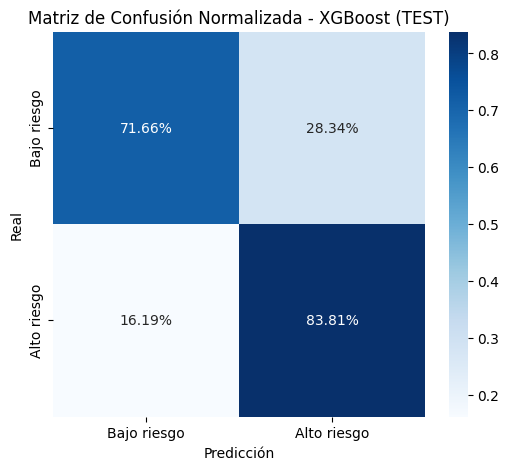

In [12]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
xgb_metrics = evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="XGBoost"
)

results.append({"Modelo": "XGBoost", **xgb_metrics})

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00

===== CatBoost =====
---- TRAIN ----
AUC: 0.9807
Recall: 0.9945
Precision: 0.6317
F1: 0.7726

---- TEST ----
AUC: 0.8508
Recall: 0.8762
Precision: 0.2238
F1: 0.3566

---- GAP (Train-Test) ----
AUC gap: 0.1299


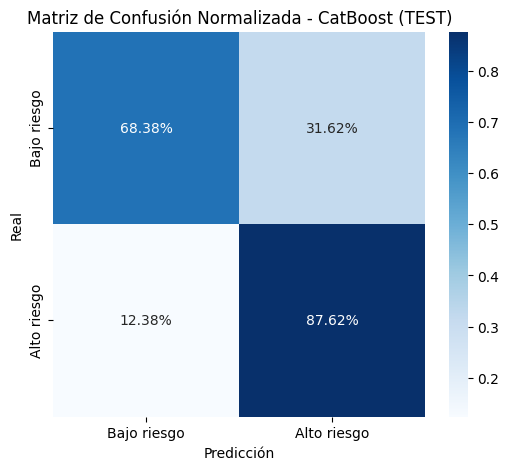

In [13]:
!pip install catboost
from catboost import CatBoostClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

modelo_cat = CatBoostClassifier(
    iterations=500,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    scale_pos_weight=ratio,
    verbose=0,
    random_state=42
)

modelo_cat.fit(X_train_sm, y_train_sm)

# Se capturan las métricas
cat_metrics = evaluar_overfitting(
    modelo_cat,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="CatBoost"
)

results.append({"Modelo": "CatBoost", **cat_metrics})


===== Balanced RF =====
---- TRAIN ----
AUC: 0.9985
Recall: 1.0000
Precision: 0.3292
F1: 0.4953

---- TEST ----
AUC: 0.8453
Recall: 0.8095
Precision: 0.2576
F1: 0.3908

---- GAP (Train-Test) ----
AUC gap: 0.1532


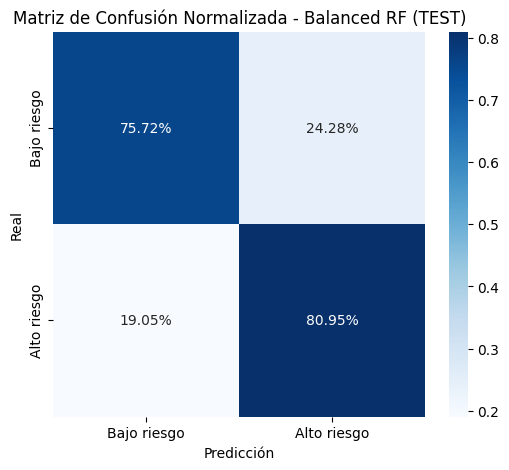

In [14]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

# Se capturan las métricas
brf_metrics = evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF"
)

results.append({"Modelo": "Balanced Random Forest", **brf_metrics})



===== Logistic Regression =====
---- TRAIN ----
AUC: 0.8854
Recall: 0.8886
Precision: 0.2535
F1: 0.3945

---- TEST ----
AUC: 0.8654
Recall: 0.8571
Precision: 0.2426
F1: 0.3782

---- GAP (Train-Test) ----
AUC gap: 0.0200


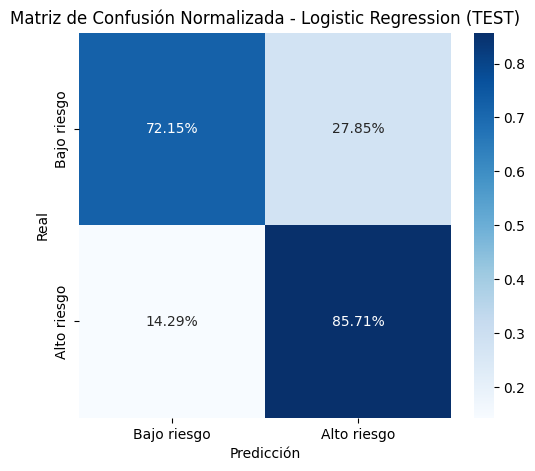

In [15]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000
)

modelo_lr.fit(X_train, y_train)

# Se capturan las métricas
lr_metrics = evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression"
)

results.append({"Modelo": "Logistic Regression", **lr_metrics})


===== Decision Tree Classifier =====
---- TRAIN ----
AUC: 0.8892
Recall: 0.9763
Precision: 0.2178
F1: 0.3561

---- TEST ----
AUC: 0.7587
Recall: 0.8095
Precision: 0.1775
F1: 0.2911

---- GAP (Train-Test) ----
AUC gap: 0.1306


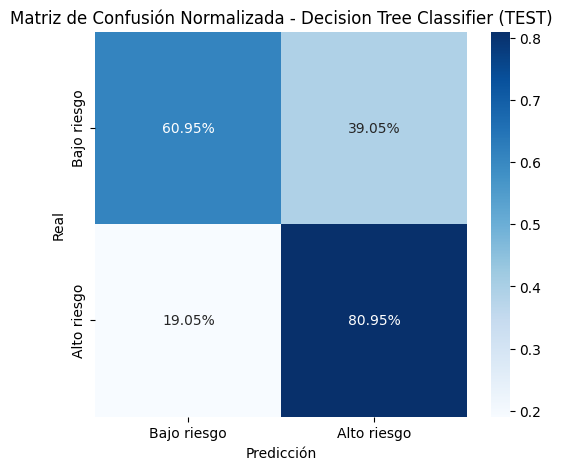

In [16]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
    class_weight='balanced'
)

modelo_dt.fit(X_train, y_train)

# Se capturan las métricas
dt_metrics = evaluar_overfitting(
    modelo_dt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Decision Tree Classifier"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "Decision Tree Classifier", **dt_metrics})


===== SVM Linear Kernel =====
---- TRAIN ----
AUC: 0.8845
Recall: 0.3957
Precision: 0.4613
F1: 0.4260

---- TEST ----
AUC: 0.8643
Recall: 0.3619
Precision: 0.4578
F1: 0.4043

---- GAP (Train-Test) ----
AUC gap: 0.0202


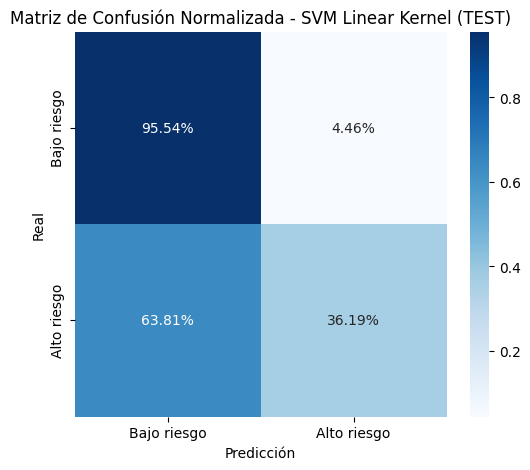

In [17]:
from sklearn.svm import SVC

modelo_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

modelo_svm.fit(X_train, y_train)

# Se capturan las métricas
svm_metrics = evaluar_overfitting(
    modelo_svm,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="SVM Linear Kernel"
)

# Se agregan las métricas al DataFrame de resultados
results.append({"Modelo": "SVM Linear Kernel", **svm_metrics})


In [18]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   bmi                                    1114 non-null   float64
 7   fumador_actual                         1114 non-null   float64
 8   act_vigorosa                           1114 non-null   int64  
 9   horas_suenio                           1114 non-null   float64
 10  anhedonia                              1114 non-null   float64
 11  hemo

In [19]:
import pandas as pd

df_results = pd.DataFrame(results)

df_results

,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap
0,Random Forest + SMOTE,0.959054,0.948909,0.680299,0.792461,0.851999,0.790476,0.259375,0.390588,0.107056
1,XGBoost,0.957805,0.960813,0.636752,0.765915,0.846571,0.838095,0.235294,0.367432,0.111234
2,CatBoost,0.980665,0.994544,0.631695,0.772640,0.850791,0.876190,0.223844,0.356589,0.129875
3,Balanced Random Forest,0.998499,1.000000,0.329173,0.495305,0.845278,0.809524,0.257576,0.390805,0.153220
4,Logistic Regression,0.885411,0.888626,0.253550,0.394529,0.865364,0.857143,0.242588,0.378151,0.020047
5,Decision Tree Classifier,0.889237,0.976303,0.217759,0.356093,0.758681,0.809524,0.177453,0.291096,0.130555
6,SVM Linear Kernel,0.884503,0.395735,0.461326,0.426020,0.864307,0.361905,0.457831,0.404255,0.020196


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    modelo_lr,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(scores.mean(), scores.std())


0.8745293308716416 0.014735932363295472


## **GRÁFICOS**

In [21]:
pip install shap

In [22]:
import shap
print("SHAP library imported successfully.")

SHAP library imported successfully.


### **RAMDOM FOREST**

In [23]:
explainer_rf_smote = shap.TreeExplainer(modelo_smote, X_train_sm)
print("SHAP TreeExplainer for Random Forest + SMOTE initialized.")

SHAP TreeExplainer for Random Forest + SMOTE initialized.


In [24]:
shap_values_rf_smote = explainer_rf_smote.shap_values(X_test)
print("SHAP values for Random Forest + SMOTE calculated.")

100%|===================| 2223/2228 [00:27<00:00]       

SHAP values for Random Forest + SMOTE calculated.


Shape of shap_values_rf_smote: (1114, 33, 2)
Shape of X_test: (1114, 33)


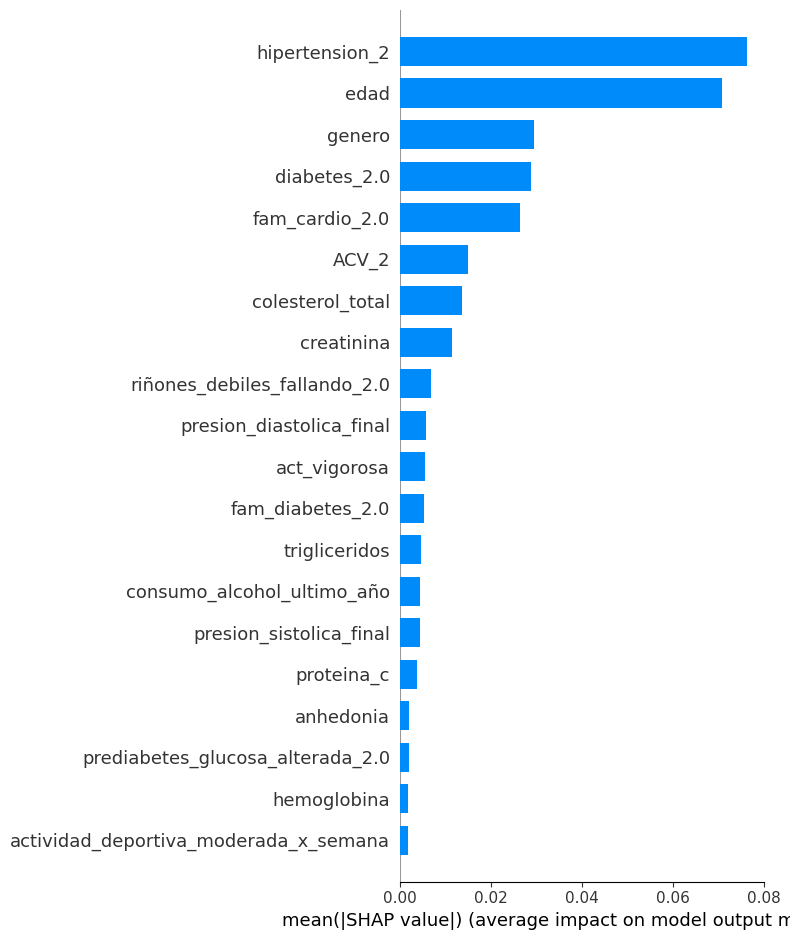

Global summary plot (bar type) for Random Forest + SMOTE generated.


In [25]:
print(f"Shape of shap_values_rf_smote: {shap_values_rf_smote.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Correctly slice for the SHAP values of the positive class (index 1) across all samples and features
shap.summary_plot(shap_values_rf_smote[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Random Forest + SMOTE generated.")

In [26]:
instance_to_explain_rf_smote = X_test.iloc[[0]]
shap_values_instance_rf_smote = explainer_rf_smote.shap_values(instance_to_explain_rf_smote)

print("Selected a specific instance from X_test for local explanation for Random Forest + SMOTE.")
print("SHAP values for the selected instance calculated.")

Selected a specific instance from X_test for local explanation for Random Forest + SMOTE.
SHAP values for the selected instance calculated.


In [27]:
shap.force_plot(explainer_rf_smote.expected_value[1], shap_values_instance_rf_smote[0, :, 1], instance_to_explain_rf_smote)
print("Local force plot for Random Forest + SMOTE generated.")

Local force plot for Random Forest + SMOTE generated.


### **CATBOOST**

In [28]:
explainer_cat = shap.TreeExplainer(modelo_cat, X_train_sm)
print("SHAP TreeExplainer for CatBoost initialized.")

SHAP TreeExplainer for CatBoost initialized.


In [29]:
shap_values_cat = explainer_cat.shap_values(X_test)
print("SHAP values for CatBoost calculated.")

 95%|=================== | 1059/1114 [00:15<00:00]       

SHAP values for CatBoost calculated.


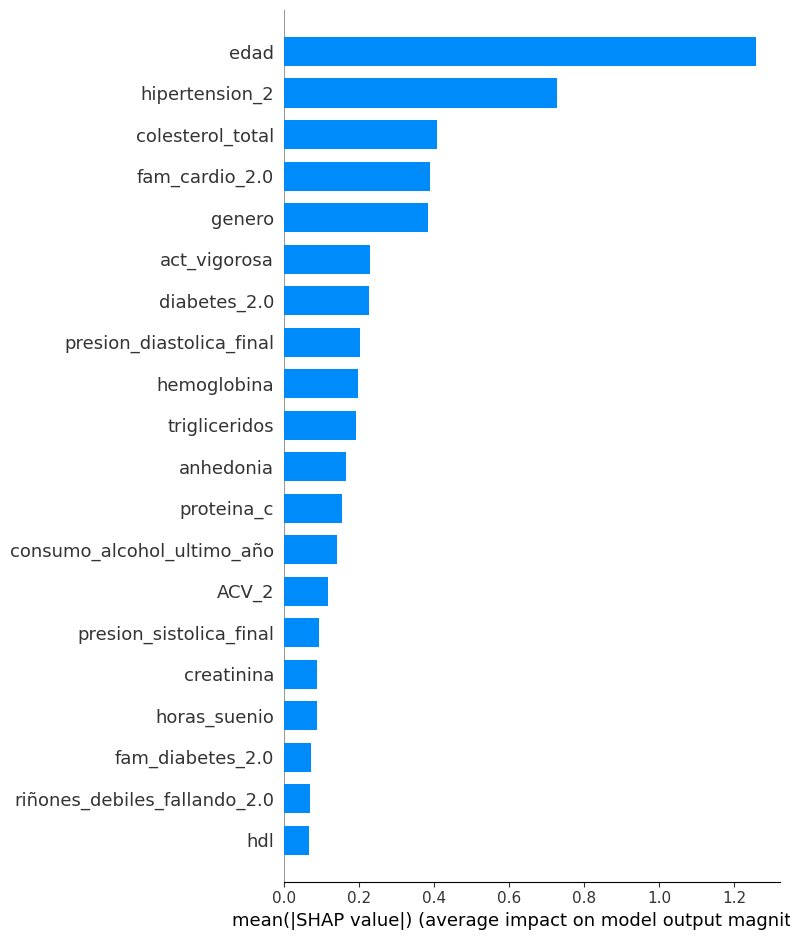

Global summary plot (bar type) for CatBoost generated.


In [30]:
shap.summary_plot(shap_values_cat, X_test, plot_type="bar")
print("Global summary plot (bar type) for CatBoost generated.")

In [31]:
instance_to_explain_cat = X_test.iloc[[0]]
shap_values_instance_cat = explainer_cat.shap_values(instance_to_explain_cat)

print("Selected a specific instance from X_test for local explanation for CatBoost.")
print("SHAP values for the selected instance calculated.")

Selected a specific instance from X_test for local explanation for CatBoost.
SHAP values for the selected instance calculated.


In [32]:
shap.force_plot(explainer_cat.expected_value, shap_values_instance_cat, instance_to_explain_cat)
print("Local force plot for CatBoost generated.")

Local force plot for CatBoost generated.


### **BALANCED RAMDOM FOREST**

In [33]:
explainer_brf = shap.TreeExplainer(modelo_brf, X_train)
print("SHAP TreeExplainer for Balanced Random Forest initialized.")

SHAP TreeExplainer for Balanced Random Forest initialized.


In [34]:
# Desactivamos check_additivity para evitar el error de precisión numérica
shap_values_brf = explainer_brf.shap_values(X_test, check_additivity=False)

print("SHAP values for Balanced Random Forest calculated (ignoring additivity gap).")

100%|===================| 2217/2228 [03:24<00:01]       

SHAP values for Balanced Random Forest calculated (ignoring additivity gap).


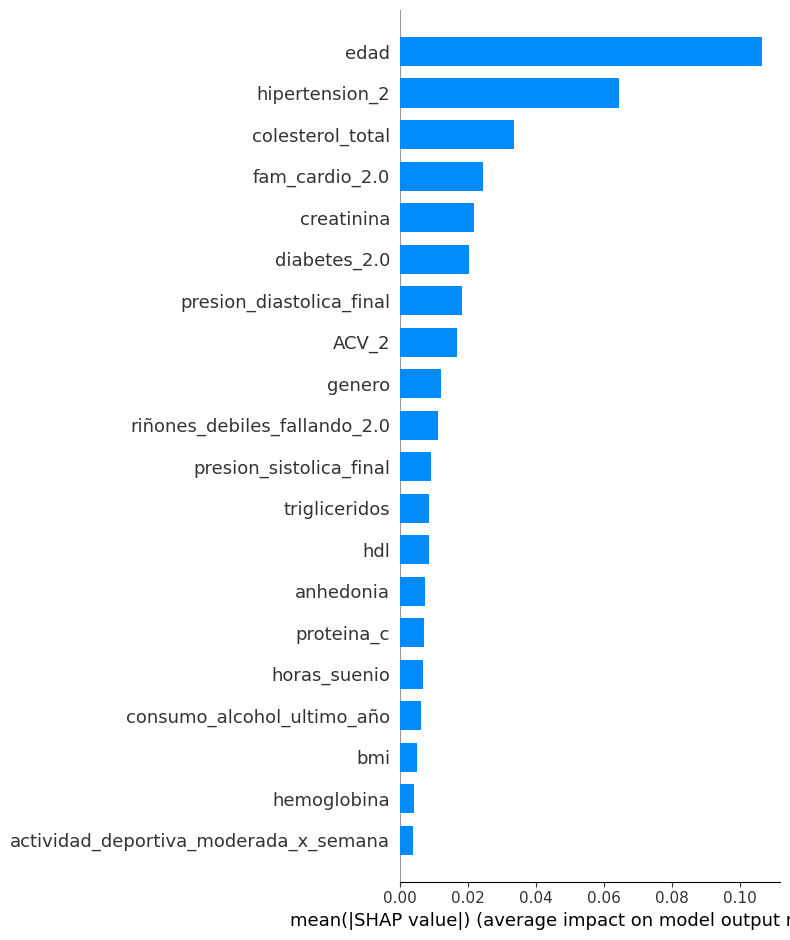

Global summary plot (bar type) for Balanced Random Forest generated.


In [35]:
shap.summary_plot(shap_values_brf[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Balanced Random Forest generated.")

In [36]:
instance_to_explain_brf = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for Balanced Random Forest.")

Selected a specific instance from X_test for local explanation for Balanced Random Forest.


In [37]:
shap_values_instance_brf = explainer_brf.shap_values(instance_to_explain_brf)
print("SHAP values for the selected instance calculated for Balanced Random Forest.")

SHAP values for the selected instance calculated for Balanced Random Forest.


In [38]:
shap.force_plot(explainer_brf.expected_value[1], shap_values_instance_brf[0, :, 1], instance_to_explain_brf)
print("Local force plot for Balanced Random Forest generated.")

Local force plot for Balanced Random Forest generated.


### **Decision Tree Classifier**

In [39]:
explainer_dt = shap.TreeExplainer(modelo_dt, X_train)
print("SHAP TreeExplainer for Decision Tree Classifier initialized.")

SHAP TreeExplainer for Decision Tree Classifier initialized.


In [40]:
shap_values_dt = explainer_dt.shap_values(X_test)
print("SHAP values for Decision Tree Classifier calculated.")

SHAP values for Decision Tree Classifier calculated.


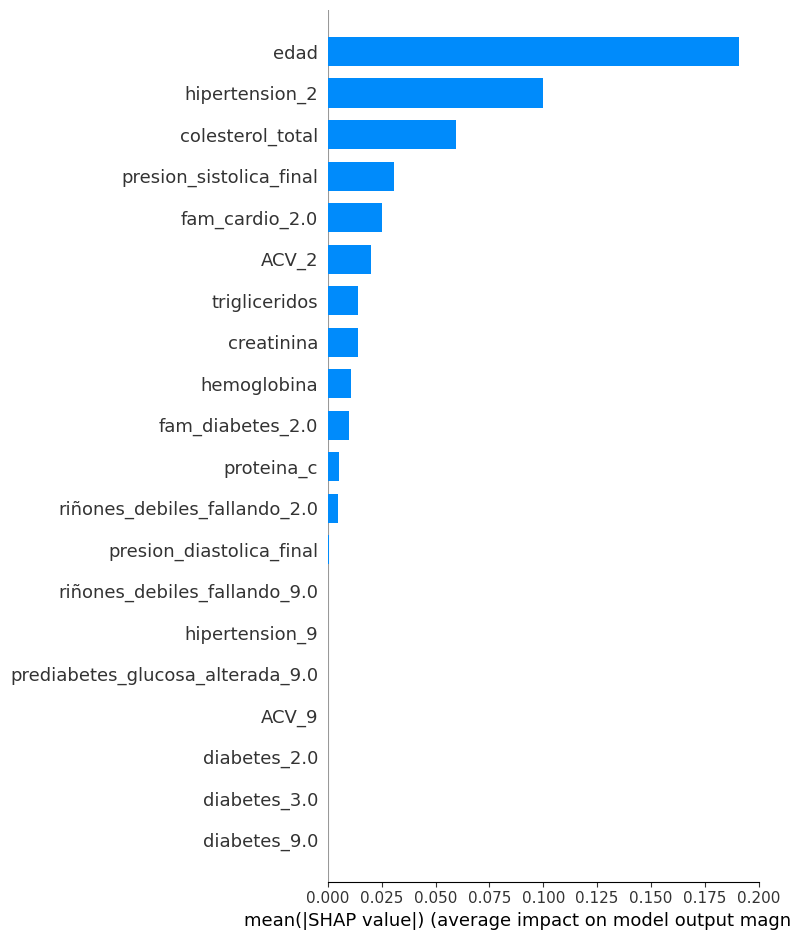

Global summary plot (bar type) for Decision Tree Classifier generated.


In [41]:
shap.summary_plot(shap_values_dt[:, :, 1], X_test, plot_type="bar")
print("Global summary plot (bar type) for Decision Tree Classifier generated.")

In [42]:
instance_to_explain_dt = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for Decision Tree Classifier.")

Selected a specific instance from X_test for local explanation for Decision Tree Classifier.


In [43]:
shap_values_instance_dt = explainer_dt.shap_values(instance_to_explain_dt)
print("SHAP values for the selected instance calculated for Decision Tree Classifier.")

SHAP values for the selected instance calculated for Decision Tree Classifier.


In [44]:
shap.force_plot(explainer_dt.expected_value[1], shap_values_instance_dt[0, :, 1], instance_to_explain_dt)
print("Local force plot for Decision Tree Classifier generated.")

Local force plot for Decision Tree Classifier generated.


### **XGBoost**

In [45]:
import shap

explainer_xgb = shap.TreeExplainer(modelo_xgb, X_train_sm)
print("SHAP TreeExplainer para XGBoost inicializado (re-generado).")

SHAP TreeExplainer para XGBoost inicializado (re-generado).


In [46]:
shap_values_xgb = explainer_xgb.shap_values(X_test)
print("Valores SHAP para XGBoost calculados (re-generado).")

Valores SHAP para XGBoost calculados (re-generado).


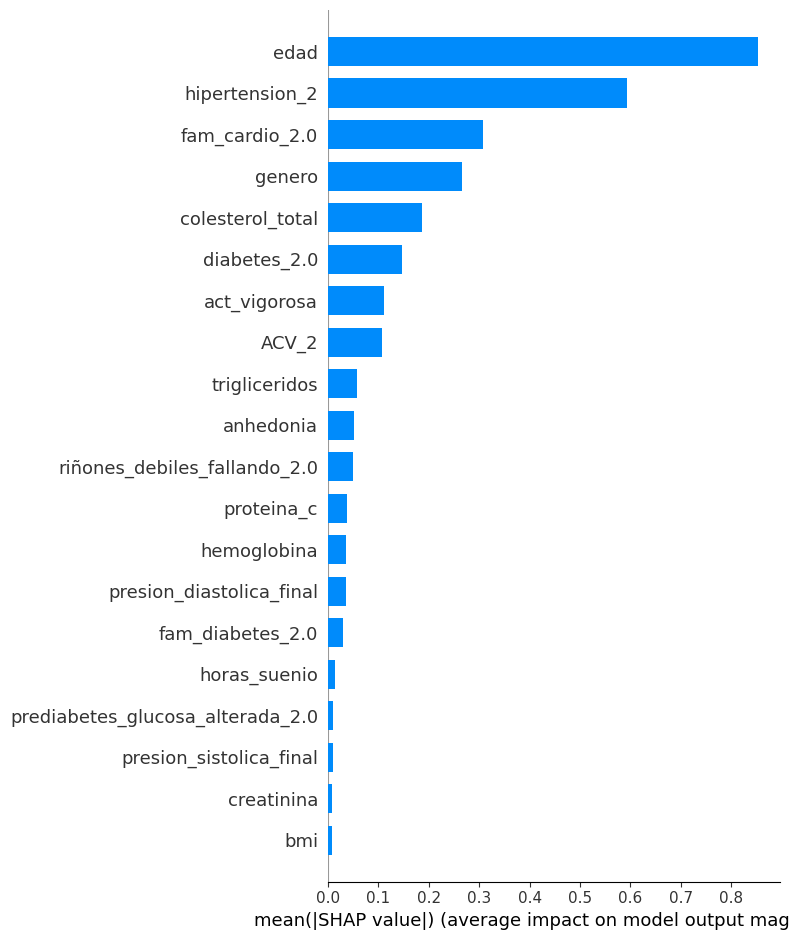

Gráfico de resumen global (barras) para XGBoost generado (re-generado).


In [47]:
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")
print("Gráfico de resumen global (barras) para XGBoost generado (re-generado).")

In [48]:
instance_to_explain_xgb = X_test.iloc[[0]]
shap_values_instance_xgb = explainer_xgb.shap_values(instance_to_explain_xgb)

print("Instancia específica para explicación local de XGBoost seleccionada y valores SHAP calculados (re-generado).")

Instancia específica para explicación local de XGBoost seleccionada y valores SHAP calculados (re-generado).


In [49]:
shap.force_plot(explainer_xgb.expected_value, shap_values_instance_xgb, instance_to_explain_xgb)
print("Gráfico de fuerza local para XGBoost generado (re-generado).")

Gráfico de fuerza local para XGBoost generado (re-generado).


### **SVM Linear Kernel**

In [50]:
explainer_svm = shap.LinearExplainer(modelo_svm, X_train)
print("SHAP LinearExplainer for SVM Linear Kernel initialized.")

SHAP LinearExplainer for SVM Linear Kernel initialized.


In [51]:
shap_values_svm = explainer_svm.shap_values(X_test)
print("SHAP values for SVM Linear Kernel calculated.")

SHAP values for SVM Linear Kernel calculated.


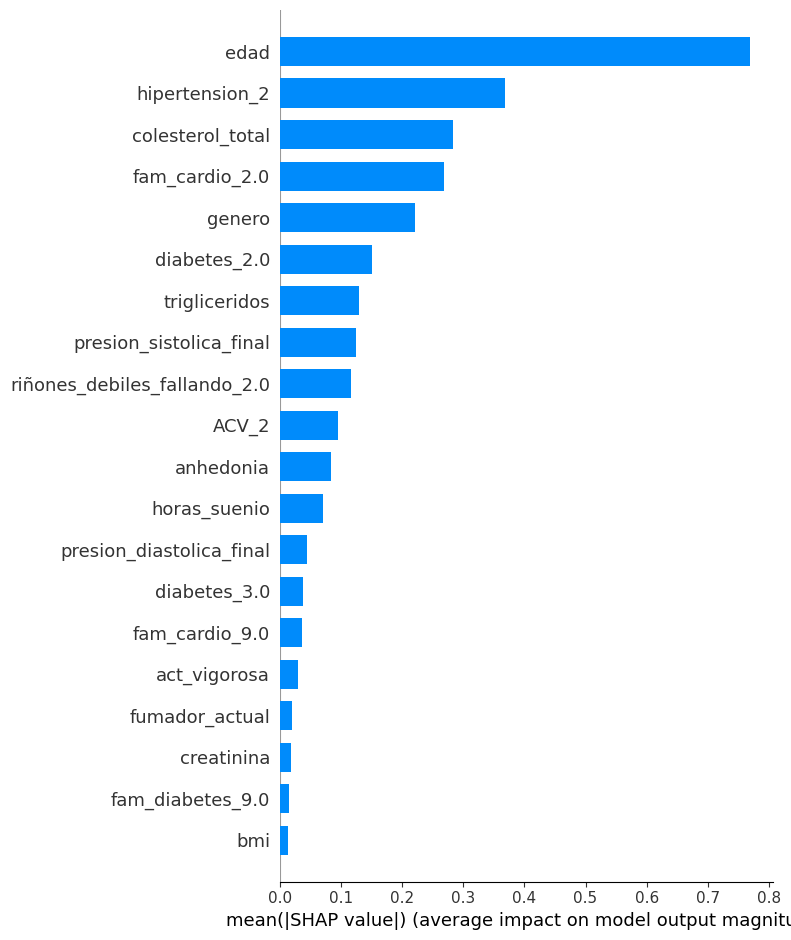

Global summary plot (bar type) for SVM Linear Kernel generated.


In [52]:
shap.summary_plot(shap_values_svm, X_test, plot_type="bar")
print("Global summary plot (bar type) for SVM Linear Kernel generated.")

In [53]:
instance_to_explain_lr = X_test.iloc[[0]]
print("Selected a specific instance from X_test for local explanation for SVM Linear Kernel.")

Selected a specific instance from X_test for local explanation for SVM Linear Kernel.


In [54]:
shap_values_instance_lr = explainer_svm.shap_values(instance_to_explain_lr)
print("SHAP values for the selected instance calculated for SVM Linear Kernel.")

SHAP values for the selected instance calculated for SVM Linear Kernel.


In [55]:
shap.force_plot(explainer_svm.expected_value, shap_values_instance_lr, instance_to_explain_lr)
print("Local force plot for SVM Linear Kernel generated.")

Local force plot for SVM Linear Kernel generated.


## **ETAPAS**

In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   1114 non-null   float64
 1   genero                                 1114 non-null   int64  
 2   colesterol_total                       1114 non-null   float64
 3   hdl                                    1114 non-null   float64
 4   trigliceridos                          1114 non-null   float64
 5   proteina_c                             1114 non-null   float64
 6   bmi                                    1114 non-null   float64
 7   fumador_actual                         1114 non-null   float64
 8   act_vigorosa                           1114 non-null   int64  
 9   horas_suenio                           1114 non-null   float64
 10  anhedonia                              1114 non-null   float64
 11  hemo

In [57]:
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'consumo_alcohol_ultimo_año',
#     'act_vigorosa', 'actividad_deportiva_moderada_x_semana']

# # NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# # Datos que requieren una historia clínica o un tensiómetro.
# nivel_2_antecedentes = [
#     'fam_cardio_2.0','fam_cardio_9.0', 'fam_diabetes_2.0','fam_diabetes_9.0', 'hipertension_2',
#     'hipertension_9', 'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
#     'ACV_2','ACV_9', 'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0',
#     'presion_sistolica_final', 'presion_diastolica_final'
# ]

# # NIVEL 3: Laboratorio Avanzado
# # Resultados bioquímicos específicos.
# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c', 'hemoglobina', 'creatinina'
# ]

# # Unificamos todas para el entrenamiento inicial
# features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

# # ETAPA 1: Lo que el paciente cuenta (Mínimo esfuerzo)
# nivel_1_basico = [
#     'edad', 'genero', 'fumador_actual', 'consumo_alcohol_ultimo_año',
#     'act_vigorosa', 'actividad_deportiva_moderada_x_semana',
#     'horas_suenio', 'anhedonia'
# ]

# # ETAPA 2: Lo que el médico mide (Examen Físico)
# nivel_2_antecedentes = [
#     'bmi', 'presion_sistolica_final', 'presion_diastolica_final',
#     'fam_cardio_2.0', 'fam_cardio_9.0', 'fam_diabetes_2.0', 'fam_diabetes_9.0',
#     'ACV_2.0', 'ACV_9.0', 'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0','hipertension_2.0', 'hipertension_9.0'
# ]

# # ETAPA 3: Lo que la sangre revela (Laboratorio)
# # nivel_3_laboratorio = [
# #     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
# #     'hemoglobina', 'creatinina', 'diabetes_2.0', 'diabetes_3.0',
# #     'prediabetes_glucosa_alterada', 'hipertension_2.0', 'hipertension_9.0'
# # ]

# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
#     'hemoglobina', 'creatinina']

# ETAPA 1: Lo que el paciente cuenta (Mínimo esfuerzo)
nivel_1_basico = [
    'edad', 'genero', 'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana',
    'horas_suenio', 'anhedonia'
]

# ETAPA 2: Lo que el médico mide (Examen Físico)
nivel_2_antecedentes = [
    'bmi', 'presion_sistolica_final', 'presion_diastolica_final',
    'fam_cardio_2.0', 'fam_cardio_9.0', 'fam_diabetes_2.0', 'fam_diabetes_9.0','diabetes_2.0', 'diabetes_3.0','prediabetes_glucosa_alterada',
    'ACV_2.0', 'ACV_9.0', 'riñones_debiles_fallando_2.0', 'riñones_debiles_fallando_9.0','hipertension_2.0', 'hipertension_9.0'
]

# ETAPA 3: Lo que la sangre revela (Laboratorio)
# nivel_3_laboratorio = [
#     'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
#     'hemoglobina', 'creatinina', 'diabetes_2.0', 'diabetes_3.0',
#     'prediabetes_glucosa_alterada', 'hipertension_2.0', 'hipertension_9.0'
# ]

nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'hemoglobina', 'creatinina']

In [58]:
nivel_1_cols = [c for c in nivel_1_basico if c in X_train.columns]
nivel_2_cols = nivel_1_cols + [c for c in nivel_2_antecedentes if c in X_train.columns]
nivel_3_cols = nivel_2_cols + [c for c in nivel_3_laboratorio if c in X_train.columns]

etapas = [nivel_2_cols, nivel_3_cols]
nombres_etapas = ["Etapa 1: Consulta Básica", "Etapa 2: + Antecedentes/Presión", "Etapa 3: + Laboratorio"]


 PROCESANDO: Etapa 1: Consulta Básica

===== Etapa 1: Consulta Básica =====
---- TRAIN ----
AUC: 0.9439
Recall: 0.9598
Precision: 0.5945
F1: 0.7342

---- TEST ----
AUC: 0.8200
Recall: 0.8190
Precision: 0.2057
F1: 0.3289

---- GAP (Train-Test) ----
AUC gap: 0.1238


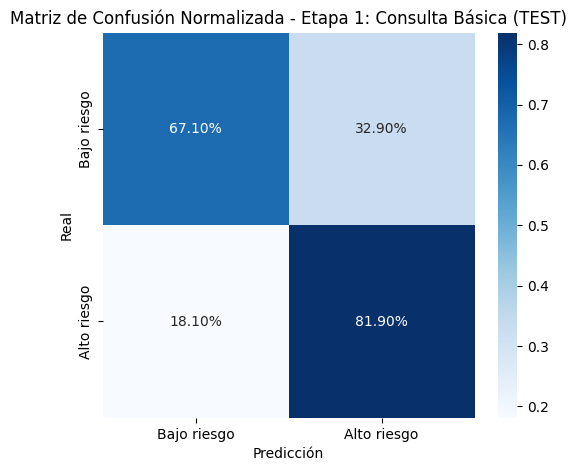


 PROCESANDO: Etapa 2: + Antecedentes/Presión

===== Etapa 2: + Antecedentes/Presión =====
---- TRAIN ----
AUC: 0.9460
Recall: 0.9638
Precision: 0.6030
F1: 0.7419

---- TEST ----
AUC: 0.8236
Recall: 0.8381
Precision: 0.2136
F1: 0.3404

---- GAP (Train-Test) ----
AUC gap: 0.1223


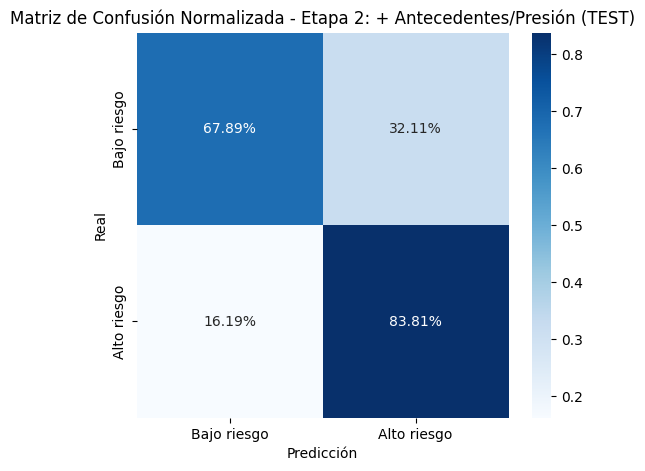

In [59]:
resultados_etapas = []

for i in range(len(etapas)):
    X_train_etapa = X_train_sm[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    modelo_etapa = XGBClassifier(
        n_estimators=200,
        max_depth=2,
        learning_rate=0.03,
        subsample=0.6,
        colsample_bytree=0.8,
        scale_pos_weight=2,
        eval_metric="auc",
        random_state=42
    )

    modelo_etapa.fit(X_train_etapa, y_train_sm)

    print(f"\n PROCESANDO: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa,
        X_train_etapa, y_train_sm,
        X_test_etapa, y_test,
        threshold=0.3,
        nombre=nombres_etapas[i]
    )

    resultados_etapas.append({"Etapa": nombres_etapas[i], **metricas})

# Convertimos a DataFrame para comparar
df_etapas = pd.DataFrame(resultados_etapas)

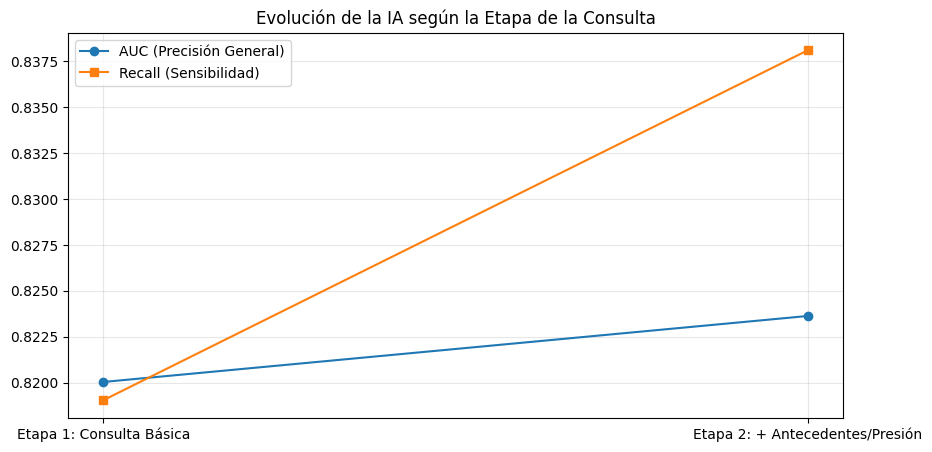

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(df_etapas['Etapa'], df_etapas['auc_test'], marker='o', label='AUC (Precisión General)')
plt.plot(df_etapas['Etapa'], df_etapas['recall_test'], marker='s', label='Recall (Sensibilidad)')
plt.title('Evolución de la IA según la Etapa de la Consulta')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 1: Consulta Básica

===== LR - Etapa 1: Consulta Básica =====
---- TRAIN ----
AUC: 0.8631
Recall: 0.8886
Precision: 0.2222
F1: 0.3555

---- TEST ----
AUC: 0.8357
Recall: 0.8381
Precision: 0.2100
F1: 0.3359

---- GAP (Train-Test) ----
AUC gap: 0.0274


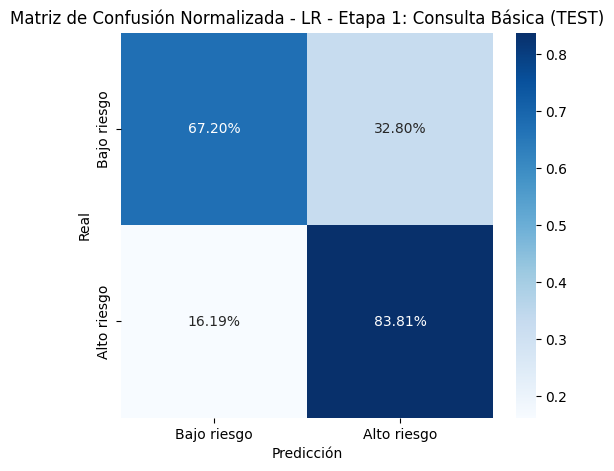


🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: Etapa 2: + Antecedentes/Presión

===== LR - Etapa 2: + Antecedentes/Presión =====
---- TRAIN ----
AUC: 0.8695
Recall: 0.8886
Precision: 0.2323
F1: 0.3684

---- TEST ----
AUC: 0.8437
Recall: 0.8667
Precision: 0.2275
F1: 0.3604

---- GAP (Train-Test) ----
AUC gap: 0.0259


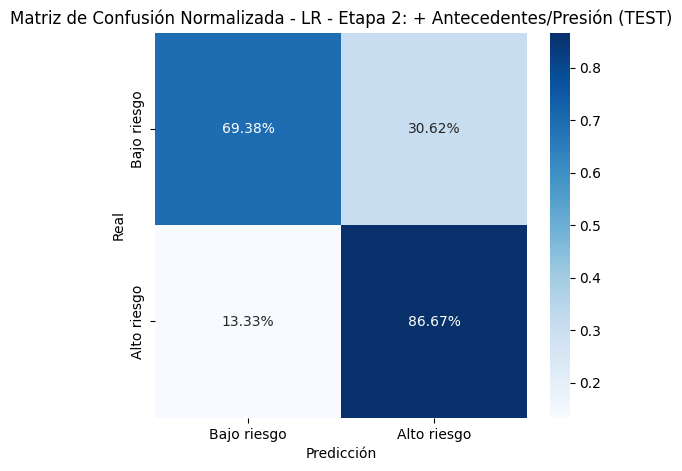


📊 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):
                             Etapa  auc_test  recall_test  precision_test
0         Etapa 1: Consulta Básica  0.835688     0.838095        0.210024
1  Etapa 2: + Antecedentes/Presión  0.843664     0.866667        0.227500


In [61]:
from sklearn.linear_model import LogisticRegression

resultados_etapas_lr = []

# Bucle de entrenamiento por etapas usando Regresión Logística
for i in range(len(etapas)):
    # Se selecciona las columnas de la etapa actual
    X_train_etapa = X_train[etapas[i]]
    X_test_etapa = X_test[etapas[i]]

    # Configuración la Regresión Logística
    # 'max_iter' alto para asegurar convergencia y 'class_weight=None'
    # porque ya balanceamos con SMOTE antes.
    modelo_etapa_lr = LogisticRegression(
        class_weight='balanced',
        max_iter=2000
    )

    modelo_etapa_lr.fit(X_train_etapa, y_train)

    print(f"\n🩺 EVALUANDO CON REGRESIÓN LOGÍSTICA: {nombres_etapas[i]}")
    metricas = evaluar_overfitting(
        modelo_etapa_lr,
        X_train_etapa, y_train,
        X_test_etapa, y_test,
        threshold=0.4,
        nombre=f"LR - {nombres_etapas[i]}"
    )

    resultados_etapas_lr.append({"Etapa": nombres_etapas[i], **metricas})


df_etapas_lr = pd.DataFrame(resultados_etapas_lr)

# Resumen final de precisión
print("\n📊 RESUMEN FINAL POR ETAPAS (LOGISTIC REGRESSION):")
print(df_etapas_lr[['Etapa', 'auc_test', 'recall_test', 'precision_test']])

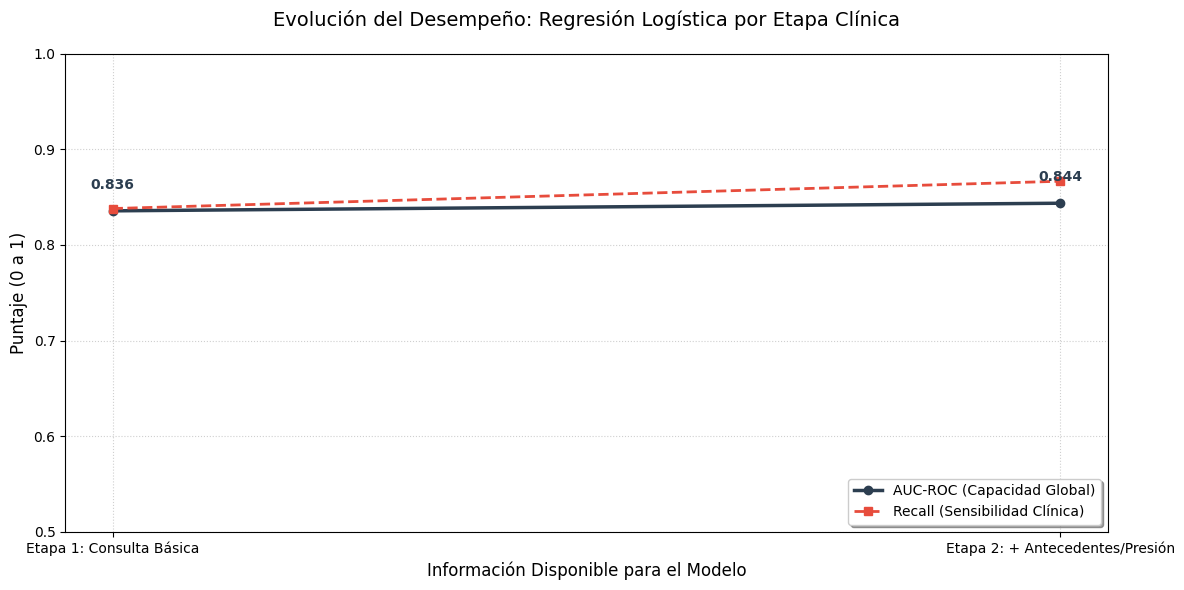

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['auc_test'],
         marker='o', linestyle='-', color='#2c3e50', linewidth=2.5, label='AUC-ROC (Capacidad Global)')

plt.plot(df_etapas_lr['Etapa'], df_etapas_lr['recall_test'],
         marker='s', linestyle='--', color='#e74c3c', linewidth=2, label='Recall (Sensibilidad Clínica)')

plt.title('Evolución del Desempeño: Regresión Logística por Etapa Clínica', fontsize=14, pad=20)
plt.ylabel('Puntaje (0 a 1)', fontsize=12)
plt.xlabel('Información Disponible para el Modelo', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right', frameon=True, shadow=True)
plt.grid(True, linestyle=':', alpha=0.6)

for x, y in zip(df_etapas_lr['Etapa'], df_etapas_lr['auc_test']):
    plt.text(x, y + 0.02, f'{y:.3f}', ha='center', va='bottom', fontweight='bold', color='#2c3e50')

plt.tight_layout()
plt.show()

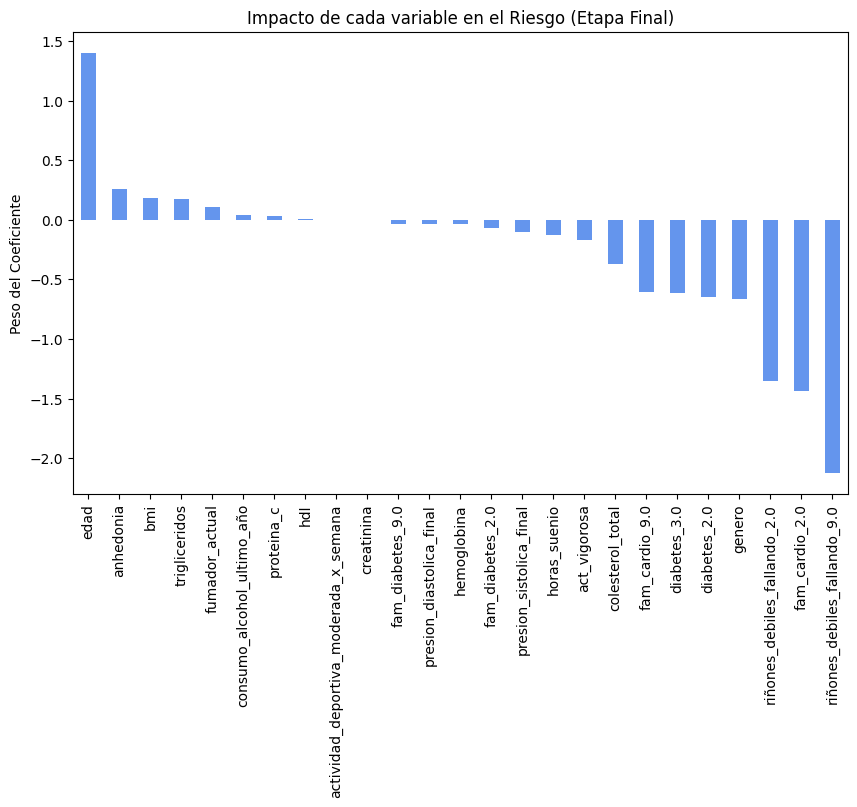

In [63]:
# Ver coeficientes de la Etapa 1 (solo consulta)
# Tomamos el primer modelo entrenado en el bucle (i=0)
importances_lr = pd.Series(modelo_etapa_lr.coef_[0], index=etapas[i]).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_lr.plot(kind='bar', color='cornflowerblue')
plt.title('Impacto de cada variable en el Riesgo (Etapa Final)')
plt.ylabel('Peso del Coeficiente')
plt.show()

## **OPTUNA**

In [64]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 7.8 MB/s eta 0:00:00


### **Random Forest**

In [65]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def objective_rf(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Crear el modelo RandomForestClassifier
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Entrenar el modelo
    model.fit(X_train_sm, y_train_sm)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for RandomForestClassifier defined.")

Objective function for RandomForestClassifier defined.


In [66]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

print("\nBest trial for RandomForestClassifier:")
print(f"  Value: {study_rf.best_value:.4f}")
print("  Params: ")
for key, value in study_rf.best_params.items():
    print(f"    {key}: {value}")

[I 2026-02-16 21:02:41,829] A new study created in memory with name: no-name-31e0d63b-75ed-4835-8374-cc46f4be10bb


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2026-02-16 21:02:49,776] Trial 0 finished with value: 0.8510736703006276 and parameters: {'n_estimators': 451, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8510736703006276.
[I 2026-02-16 21:02:54,872] Trial 1 finished with value: 0.8477134362169049 and parameters: {'n_estimators': 145, 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8510736703006276.
[I 2026-02-16 21:03:07,351] Trial 2 finished with value: 0.8515833687290575 and parameters: {'n_estimators': 457, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.8515833687290575.
[I 2026-02-16 21:03:09,438] Trial 3 finished with value: 0.8543395157864929 and parameters: {'n_estimators': 88, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.8543395157864929.
[I 2026-02-16 21:03:12,588] Trial 4 finished with value: 0.8503940723960546 and parameters: 


===== Optimized Random Forest + SMOTE =====
---- TRAIN ----
AUC: 0.9730
Recall: 0.9603
Precision: 0.7284
F1: 0.8284

---- TEST ----
AUC: 0.8543
Recall: 0.7810
Precision: 0.3026
F1: 0.4362

---- GAP (Train-Test) ----
AUC gap: 0.1187


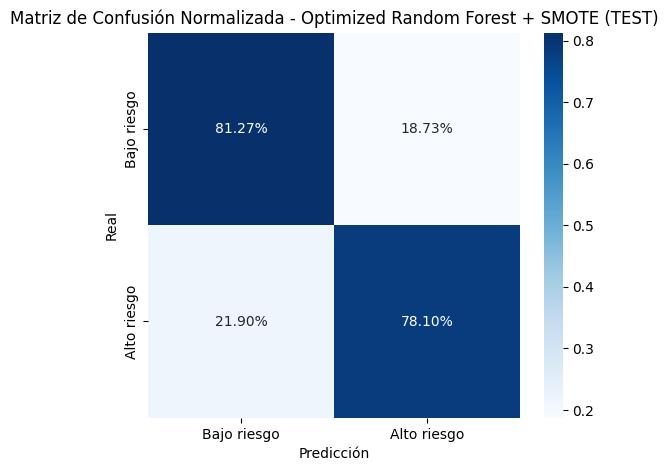

Optimized RandomForestClassifier trained, evaluated, and results stored.


In [67]:
modelo_rf_opt = RandomForestClassifier(
    **study_rf.best_params,
    random_state=42
)
modelo_rf_opt.fit(X_train_sm, y_train_sm)

# Evaluar el modelo optimizado
rf_opt_metrics = evaluar_overfitting(
    modelo_rf_opt,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized Random Forest + SMOTE"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Random Forest + SMOTE", **rf_opt_metrics})

print("Optimized RandomForestClassifier trained, evaluated, and results stored.")

### **XGBOOST**

In [68]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

def objective_xgb(trial):
    # Sugerir hiperparámetros para XGBoost
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    # scale_pos_weight para manejar el desbalance de clases
    # Como X_train_sm ya está resampleado, usamos un valor más cercano a 1 o 1 directamente
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 5.0)

    # Crear el modelo XGBoostClassifier
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        min_child_weight=min_child_weight,
        scale_pos_weight=scale_pos_weight,
        eval_metric="auc",
        use_label_encoder=False, # Suprimir el warning de label encoder
        random_state=42
    )

    # Entrenar el modelo con los datos de SMOTE
    model.fit(X_train_sm, y_train_sm)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for XGBoostClassifier defined.")

Objective function for XGBoostClassifier defined.


In [69]:
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)

print("\nBest trial for XGBoostClassifier:")
print(f"  Value: {study_xgb.best_value:.4f}")
print("  Params: ")
for key, value in study_xgb.best_params.items():
    print(f"    {key}: {value}")

[I 2026-02-16 21:06:17,928] A new study created in memory with name: no-name-e2aabd38-a629-49d4-8d4e-49dbc530394e


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:06:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:02,264] Trial 0 finished with value: 0.8379725329180234 and parameters: {'n_estimators': 761, 'max_depth': 10, 'learning_rate': 0.002741611802736471, 'subsample': 0.8194308707441875, 'colsample_bytree': 0.9807877330263994, 'min_child_weight': 8, 'scale_pos_weight': 3.7346612339685956}. Best is trial 0 with value: 0.8379725329180234.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:05,362] Trial 1 finished with value: 0.8426919628108924 and parameters: {'n_estimators': 540, 'max_depth': 8, 'learning_rate': 0.0016874145209612133, 'subsample': 0.6879332525496085, 'colsample_bytree': 0.7371163956473107, 'min_child_weight': 8, 'scale_pos_weight': 2.779832289914797}. Best is trial 1 with value: 0.8426919628108924.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:07,407] Trial 2 finished with value: 0.841917976308462 and parameters: {'n_estimators': 672, 'max_depth': 5, 'learning_rate': 0.0013235066293788113, 'subsample': 0.7661586686852413, 'colsample_bytree': 0.7388203246437484, 'min_child_weight': 7, 'scale_pos_weight': 3.0836524771852876}. Best is trial 1 with value: 0.8426919628108924.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:14,845] Trial 3 finished with value: 0.8461560243522582 and parameters: {'n_estimators': 930, 'max_depth': 8, 'learning_rate': 0.003410577934375645, 'subsample': 0.9476034496954274, 'colsample_bytree': 0.5506476305045478, 'min_child_weight': 9, 'scale_pos_weight': 3.939699397952285}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:16,545] Trial 4 finished with value: 0.8333002973240833 and parameters: {'n_estimators': 970, 'max_depth': 4, 'learning_rate': 0.041090962514743645, 'subsample': 0.7163668873125757, 'colsample_bytree': 0.659134386217545, 'min_child_weight': 2, 'scale_pos_weight': 1.104145506531423}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:18,956] Trial 5 finished with value: 0.845410354429185 and parameters: {'n_estimators': 930, 'max_depth': 5, 'learning_rate': 0.006105275712076274, 'subsample': 0.8225288169797476, 'colsample_bytree': 0.677294805912001, 'min_child_weight': 6, 'scale_pos_weight': 4.53362241819017}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:19,451] Trial 6 finished with value: 0.8390580017933833 and parameters: {'n_estimators': 131, 'max_depth': 5, 'learning_rate': 0.003040605708602489, 'subsample': 0.70797267128176, 'colsample_bytree': 0.7909779393603591, 'min_child_weight': 7, 'scale_pos_weight': 4.549679572350094}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:23,042] Trial 7 finished with value: 0.8434942658926802 and parameters: {'n_estimators': 885, 'max_depth': 6, 'learning_rate': 0.0018090303269967464, 'subsample': 0.5332263388203515, 'colsample_bytree': 0.9005671425027015, 'min_child_weight': 6, 'scale_pos_weight': 2.021230746637045}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:27,765] Trial 8 finished with value: 0.8322431450280805 and parameters: {'n_estimators': 655, 'max_depth': 4, 'learning_rate': 0.00176761613569995, 'subsample': 0.8206026763700427, 'colsample_bytree': 0.9652855452180544, 'min_child_weight': 3, 'scale_pos_weight': 2.582696543335571}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:32,418] Trial 9 finished with value: 0.8359809335032328 and parameters: {'n_estimators': 879, 'max_depth': 8, 'learning_rate': 0.011918246159933907, 'subsample': 0.9775375722090466, 'colsample_bytree': 0.9902235679077056, 'min_child_weight': 8, 'scale_pos_weight': 4.8593258127537045}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:34,411] Trial 10 finished with value: 0.8385860588040964 and parameters: {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.023805316188984255, 'subsample': 0.9997422361775687, 'colsample_bytree': 0.523722977084648, 'min_child_weight': 10, 'scale_pos_weight': 3.777693705723445}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:42,396] Trial 11 finished with value: 0.8421633866628911 and parameters: {'n_estimators': 980, 'max_depth': 8, 'learning_rate': 0.0063149830133779625, 'subsample': 0.9185721191323716, 'colsample_bytree': 0.5594527444033272, 'min_child_weight': 4, 'scale_pos_weight': 4.15093821911089}. Best is trial 3 with value: 0.8461560243522582.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:43,696] Trial 12 finished with value: 0.8466090896219737 and parameters: {'n_estimators': 285, 'max_depth': 7, 'learning_rate': 0.006937055371651388, 'subsample': 0.8938167697286052, 'colsample_bytree': 0.6240072877297032, 'min_child_weight': 10, 'scale_pos_weight': 4.209857274124181}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:44,803] Trial 13 finished with value: 0.8457973476804002 and parameters: {'n_estimators': 281, 'max_depth': 7, 'learning_rate': 0.012625663540717973, 'subsample': 0.9145604713133081, 'colsample_bytree': 0.6040707975535781, 'min_child_weight': 10, 'scale_pos_weight': 3.477706574920512}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:45,791] Trial 14 finished with value: 0.8277596866298551 and parameters: {'n_estimators': 338, 'max_depth': 9, 'learning_rate': 0.09650098831994296, 'subsample': 0.9073989459686576, 'colsample_bytree': 0.5079713632062286, 'min_child_weight': 10, 'scale_pos_weight': 4.16199540328571}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:46,349] Trial 15 finished with value: 0.8433526829958942 and parameters: {'n_estimators': 110, 'max_depth': 7, 'learning_rate': 0.0054239171609541, 'subsample': 0.8751450135216776, 'colsample_bytree': 0.5983646511171958, 'min_child_weight': 9, 'scale_pos_weight': 3.4670011341285365}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:47,502] Trial 16 finished with value: 0.8459389305771863 and parameters: {'n_estimators': 280, 'max_depth': 6, 'learning_rate': 0.003649905144697066, 'subsample': 0.9587758206458349, 'colsample_bytree': 0.6540094184265892, 'min_child_weight': 5, 'scale_pos_weight': 4.2713195379637074}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:49,582] Trial 17 finished with value: 0.8412195006843173 and parameters: {'n_estimators': 447, 'max_depth': 9, 'learning_rate': 0.02239311155366731, 'subsample': 0.6029055942321764, 'colsample_bytree': 0.8227610831596668, 'min_child_weight': 9, 'scale_pos_weight': 4.832110475532171}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:07:57,182] Trial 18 finished with value: 0.8456746425031856 and parameters: {'n_estimators': 793, 'max_depth': 7, 'learning_rate': 0.0010249190512498093, 'subsample': 0.8709483733231245, 'colsample_bytree': 0.6016003873142102, 'min_child_weight': 1, 'scale_pos_weight': 2.2143001334104118}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:07:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:00,104] Trial 19 finished with value: 0.844258813535325 and parameters: {'n_estimators': 585, 'max_depth': 9, 'learning_rate': 0.008472981092823673, 'subsample': 0.772923381735994, 'colsample_bytree': 0.6919140575291456, 'min_child_weight': 9, 'scale_pos_weight': 3.2415573342873096}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:00,432] Trial 20 finished with value: 0.8355561848128745 and parameters: {'n_estimators': 209, 'max_depth': 3, 'learning_rate': 0.00470232274735579, 'subsample': 0.6470690313271656, 'colsample_bytree': 0.5616751072656233, 'min_child_weight': 7, 'scale_pos_weight': 3.842388552510852}. Best is trial 12 with value: 0.8466090896219737.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:01,886] Trial 21 finished with value: 0.8466940393600453 and parameters: {'n_estimators': 348, 'max_depth': 6, 'learning_rate': 0.003499780572838656, 'subsample': 0.9557931811153397, 'colsample_bytree': 0.6387444683670279, 'min_child_weight': 4, 'scale_pos_weight': 4.314357149911377}. Best is trial 21 with value: 0.8466940393600453.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:03,510] Trial 22 finished with value: 0.8486950776346218 and parameters: {'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.0030801240237646192, 'subsample': 0.9466865081706858, 'colsample_bytree': 0.6141120668773482, 'min_child_weight': 4, 'scale_pos_weight': 4.4905926300133805}. Best is trial 22 with value: 0.8486950776346218.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:05,066] Trial 23 finished with value: 0.843824625985181 and parameters: {'n_estimators': 398, 'max_depth': 6, 'learning_rate': 0.009177240435130796, 'subsample': 0.8649678518057744, 'colsample_bytree': 0.6492404019455603, 'min_child_weight': 4, 'scale_pos_weight': 4.9698391143589165}. Best is trial 22 with value: 0.8486950776346218.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:08,143] Trial 24 finished with value: 0.8458351031195431 and parameters: {'n_estimators': 362, 'max_depth': 6, 'learning_rate': 0.0023602497277113105, 'subsample': 0.9447532290595881, 'colsample_bytree': 0.7098092356814575, 'min_child_weight': 4, 'scale_pos_weight': 4.574859003485113}. Best is trial 22 with value: 0.8486950776346218.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:08] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:10,732] Trial 25 finished with value: 0.8410024069092454 and parameters: {'n_estimators': 192, 'max_depth': 7, 'learning_rate': 0.017662317494219672, 'subsample': 0.9953203023582458, 'colsample_bytree': 0.625908300668867, 'min_child_weight': 3, 'scale_pos_weight': 4.356423636769978}. Best is trial 22 with value: 0.8486950776346218.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:12,450] Trial 26 finished with value: 0.844041719760253 and parameters: {'n_estimators': 530, 'max_depth': 5, 'learning_rate': 0.004433493592144537, 'subsample': 0.8961959124606619, 'colsample_bytree': 0.7966490085424168, 'min_child_weight': 5, 'scale_pos_weight': 3.5215738714984686}. Best is trial 22 with value: 0.8486950776346218.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:12] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:13,085] Trial 27 finished with value: 0.8449100948605409 and parameters: {'n_estimators': 285, 'max_depth': 4, 'learning_rate': 0.006584754037301446, 'subsample': 0.8291606351357634, 'colsample_bytree': 0.6224898595872497, 'min_child_weight': 3, 'scale_pos_weight': 4.033557962394314}. Best is trial 22 with value: 0.8486950776346218.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:14,935] Trial 28 finished with value: 0.8488272216716221 and parameters: {'n_estimators': 472, 'max_depth': 6, 'learning_rate': 0.002191980088622001, 'subsample': 0.9542764488151079, 'colsample_bytree': 0.5729715730574644, 'min_child_weight': 2, 'scale_pos_weight': 4.589350204284575}. Best is trial 28 with value: 0.8488272216716221.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:17,694] Trial 29 finished with value: 0.848902732549908 and parameters: {'n_estimators': 452, 'max_depth': 6, 'learning_rate': 0.002267365510447496, 'subsample': 0.9521458810469158, 'colsample_bytree': 0.572787975077086, 'min_child_weight': 1, 'scale_pos_weight': 4.673997934094251}. Best is trial 29 with value: 0.848902732549908.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:17] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:18,410] Trial 30 finished with value: 0.8353013355986596 and parameters: {'n_estimators': 469, 'max_depth': 3, 'learning_rate': 0.002331454233364437, 'subsample': 0.8553704960463222, 'colsample_bytree': 0.5702487171993138, 'min_child_weight': 1, 'scale_pos_weight': 4.732552316084685}. Best is trial 29 with value: 0.848902732549908.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:20,201] Trial 31 finished with value: 0.8482797678040492 and parameters: {'n_estimators': 489, 'max_depth': 6, 'learning_rate': 0.0025853992615578977, 'subsample': 0.9628320398706973, 'colsample_bytree': 0.5283370372940791, 'min_child_weight': 2, 'scale_pos_weight': 4.469324287657058}. Best is trial 29 with value: 0.848902732549908.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:24,561] Trial 32 finished with value: 0.8498466185284819 and parameters: {'n_estimators': 518, 'max_depth': 5, 'learning_rate': 0.001217259878625324, 'subsample': 0.9327462096889635, 'colsample_bytree': 0.5049532075678631, 'min_child_weight': 2, 'scale_pos_weight': 4.586543101066913}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:26,346] Trial 33 finished with value: 0.8486101278965501 and parameters: {'n_estimators': 612, 'max_depth': 5, 'learning_rate': 0.001024090166078419, 'subsample': 0.9218031134238348, 'colsample_bytree': 0.583636254599555, 'min_child_weight': 2, 'scale_pos_weight': 4.964625512173809}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:27,771] Trial 34 finished with value: 0.8492330926424089 and parameters: {'n_estimators': 546, 'max_depth': 5, 'learning_rate': 0.0013763961778081957, 'subsample': 0.9399280081329577, 'colsample_bytree': 0.5035243787292563, 'min_child_weight': 1, 'scale_pos_weight': 4.694412054121274}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:29,168] Trial 35 finished with value: 0.8451177497758271 and parameters: {'n_estimators': 708, 'max_depth': 4, 'learning_rate': 0.0014526165251353895, 'subsample': 0.7981397128988396, 'colsample_bytree': 0.5365010569216156, 'min_child_weight': 1, 'scale_pos_weight': 4.71707570559795}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:30,546] Trial 36 finished with value: 0.8469583274340461 and parameters: {'n_estimators': 535, 'max_depth': 5, 'learning_rate': 0.0012986264136724034, 'subsample': 0.9859062543349885, 'colsample_bytree': 0.5178934536110236, 'min_child_weight': 2, 'scale_pos_weight': 1.1410243184783366}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:32,049] Trial 37 finished with value: 0.8491575817641229 and parameters: {'n_estimators': 584, 'max_depth': 5, 'learning_rate': 0.002104189144848177, 'subsample': 0.8452797129220784, 'colsample_bytree': 0.506512343350696, 'min_child_weight': 1, 'scale_pos_weight': 4.6926482267289975}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:33,438] Trial 38 finished with value: 0.845117749775827 and parameters: {'n_estimators': 742, 'max_depth': 4, 'learning_rate': 0.0013498461420906054, 'subsample': 0.842685361743172, 'colsample_bytree': 0.5084868469876155, 'min_child_weight': 1, 'scale_pos_weight': 4.015957247119978}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:37,722] Trial 39 finished with value: 0.8491953372032659 and parameters: {'n_estimators': 621, 'max_depth': 5, 'learning_rate': 0.001843223323435392, 'subsample': 0.794291360546476, 'colsample_bytree': 0.5005810627462365, 'min_child_weight': 1, 'scale_pos_weight': 2.778086670772195}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:39,590] Trial 40 finished with value: 0.8493463589598376 and parameters: {'n_estimators': 619, 'max_depth': 5, 'learning_rate': 0.0016352470415337988, 'subsample': 0.7414178495962105, 'colsample_bytree': 0.5041672024973641, 'min_child_weight': 2, 'scale_pos_weight': 2.9140641752014163}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:41,227] Trial 41 finished with value: 0.8492991646609088 and parameters: {'n_estimators': 638, 'max_depth': 5, 'learning_rate': 0.0017412105732004023, 'subsample': 0.744732976354403, 'colsample_bytree': 0.5001155317612446, 'min_child_weight': 2, 'scale_pos_weight': 2.6578829762474774}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:42,491] Trial 42 finished with value: 0.8447401953843975 and parameters: {'n_estimators': 669, 'max_depth': 4, 'learning_rate': 0.0015631601775559533, 'subsample': 0.7257851788590284, 'colsample_bytree': 0.5431781558124897, 'min_child_weight': 2, 'scale_pos_weight': 2.787951018895077}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:44,123] Trial 43 finished with value: 0.8487233942139789 and parameters: {'n_estimators': 619, 'max_depth': 5, 'learning_rate': 0.0011122537749894672, 'subsample': 0.6789413724098983, 'colsample_bytree': 0.5424689354421525, 'min_child_weight': 3, 'scale_pos_weight': 2.381268054759365}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:46,172] Trial 44 finished with value: 0.8495445750153381 and parameters: {'n_estimators': 812, 'max_depth': 5, 'learning_rate': 0.0017751038068742851, 'subsample': 0.7518956029810261, 'colsample_bytree': 0.5037001010863261, 'min_child_weight': 2, 'scale_pos_weight': 2.9778684062323113}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:48,297] Trial 45 finished with value: 0.8484591061399783 and parameters: {'n_estimators': 812, 'max_depth': 5, 'learning_rate': 0.0012714999992127361, 'subsample': 0.7360371159578929, 'colsample_bytree': 0.5414615713320619, 'min_child_weight': 3, 'scale_pos_weight': 1.8025347251621824}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:52,357] Trial 46 finished with value: 0.8283826513757138 and parameters: {'n_estimators': 714, 'max_depth': 3, 'learning_rate': 0.0017489980991986641, 'subsample': 0.7553930864244682, 'colsample_bytree': 0.8792692829781861, 'min_child_weight': 2, 'scale_pos_weight': 3.030126156964204}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:53,953] Trial 47 finished with value: 0.8452404549530417 and parameters: {'n_estimators': 843, 'max_depth': 4, 'learning_rate': 0.0016128331263147474, 'subsample': 0.6737594147121754, 'colsample_bytree': 0.5280910432433864, 'min_child_weight': 3, 'scale_pos_weight': 2.802307135420785}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:55,190] Trial 48 finished with value: 0.8410967955071026 and parameters: {'n_estimators': 558, 'max_depth': 5, 'learning_rate': 0.04192472933526333, 'subsample': 0.7007995909403839, 'colsample_bytree': 0.5000226619936494, 'min_child_weight': 2, 'scale_pos_weight': 2.539541002364883}. Best is trial 32 with value: 0.8498466185284819.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[I 2026-02-16 21:08:56,898] Trial 49 finished with value: 0.8470055217329746 and parameters: {'n_estimators': 915, 'max_depth': 4, 'learning_rate': 0.002841639777555904, 'subsample': 0.6185829972310883, 'colsample_bytree': 0.5506434180902113, 'min_child_weight': 3, 'scale_pos_weight': 3.2313027246185335}. Best is trial 32 with value: 0.8498466185284819.

Best trial for XGBoostClassifier:
  Value: 0.8498
  Params: 
    n_estimators: 518
    max_depth: 5
    learning_rate: 0.001217259878625324
    subsample: 0.9327462096889635
    colsample_bytree: 0.5049532075678631
    min_child_weight: 2
    scale_pos_weight: 4.586543101066913


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:08:56] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== Optimized XGBoost =====
---- TRAIN ----
AUC: 0.9702
Recall: 1.0000
Precision: 0.3333
F1: 0.5000

---- TEST ----
AUC: 0.8498
Recall: 1.0000
Precision: 0.0943
F1: 0.1723

---- GAP (Train-Test) ----
AUC gap: 0.1203


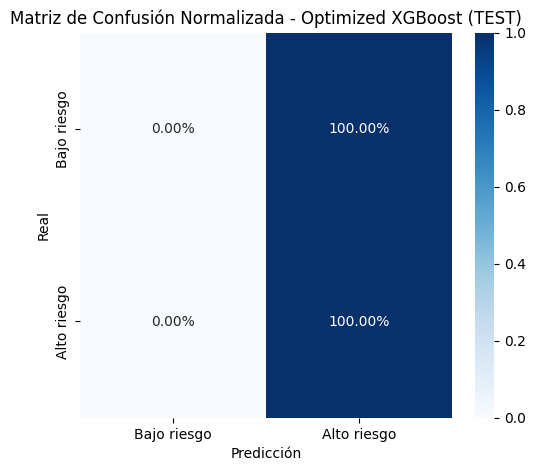

Optimized XGBoostClassifier trained, evaluated, and results stored.


In [70]:
modelo_xgb_opt = XGBClassifier(
    **study_xgb.best_params,
    eval_metric="auc",
    use_label_encoder=False, # Suprimir el warning de label encoder
    random_state=42
)
modelo_xgb_opt.fit(X_train_sm, y_train_sm)

# Evaluar el modelo optimizado
xgb_opt_metrics = evaluar_overfitting(
    modelo_xgb_opt,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized XGBoost"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized XGBoost", **xgb_opt_metrics})

print("Optimized XGBoostClassifier trained, evaluated, and results stored.")

### **CATBOOST**

In [71]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

def objective_cat(trial):
    # Sugerir hiperparámetros para CatBoost
    iterations = trial.suggest_int('iterations', 50, 500)
    depth = trial.suggest_int('depth', 3, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-5, 10.0, log=True)
    # scale_pos_weight para manejar el desbalance de clases
    # Como X_train_sm ya está resampleado, usamos un valor más cercano a 1 o 1 directamente
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1.0, 5.0)

    # Crear el modelo CatBoostClassifier
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        loss_function='Logloss',
        scale_pos_weight=scale_pos_weight,
        verbose=0,
        random_state=42,
        allow_writing_files=False # Avoid creating temporary files
    )

    # Entrenar el modelo con los datos de SMOTE
    model.fit(X_train_sm, y_train_sm)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for CatBoostClassifier defined.")

Objective function for CatBoostClassifier defined.


In [ ]:
study_cat = optuna.create_study(direction='maximize')
study_cat.optimize(objective_cat, n_trials=50, show_progress_bar=True)

print("\nBest trial for CatBoostClassifier:")
print(f"  Value: {study_cat.best_value:.4f}")
print("  Params: ")
for key, value in study_cat.best_params.items():
    print(f"    {key}: {value}")


===== Optimized CatBoost =====
---- TRAIN ----
AUC: 0.9650
Recall: 0.9678
Precision: 0.6663
F1: 0.7892

---- TEST ----
AUC: 0.8529
Recall: 0.8190
Precision: 0.2493
F1: 0.3822

---- GAP (Train-Test) ----
AUC gap: 0.1121


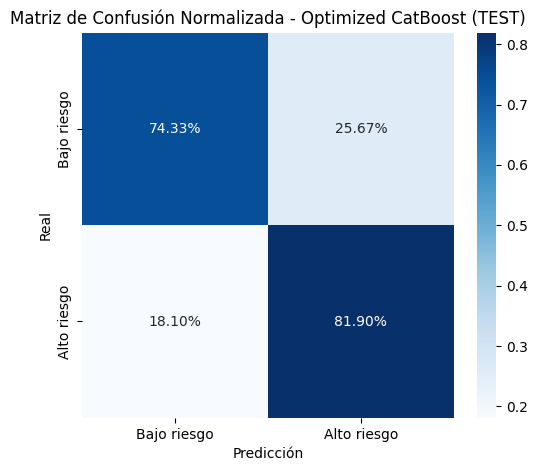

Optimized CatBoostClassifier trained, evaluated, and results stored.


In [73]:
modelo_cat_opt = CatBoostClassifier(
    **study_cat.best_params,
    loss_function='Logloss',
    verbose=0,
    random_state=42,
    allow_writing_files=False # Avoid creating temporary files
)
modelo_cat_opt.fit(X_train_sm, y_train_sm)

# Evaluar el modelo optimizado
cat_opt_metrics = evaluar_overfitting(
    modelo_cat_opt,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="Optimized CatBoost"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized CatBoost", **cat_opt_metrics})

print("Optimized CatBoostClassifier trained, evaluated, and results stored.")

### **BALANCE RAMDOM FOREST**

In [74]:
import optuna
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score

def objective_brf(trial):
    # Sugerir hiperparámetros para BalancedRandomForestClassifier
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    # Crear el modelo BalancedRandomForestClassifier
    model = BalancedRandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        sampling_strategy='auto',
        replacement=False
    )

    # Entrenar el modelo con los datos originales (no SMOTE, ya que BRF maneja el balanceo)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for BalancedRandomForestClassifier defined.")

Objective function for BalancedRandomForestClassifier defined.


In [ ]:
study_brf = optuna.create_study(direction='maximize')
study_brf.optimize(objective_brf, n_trials=50, show_progress_bar=True)

print("\nBest trial for BalancedRandomForestClassifier:")
print(f"  Value: {study_brf.best_value:.4f}")
print("  Params: ")
for key, value in study_brf.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Balanced Random Forest =====
---- TRAIN ----
AUC: 0.9456
Recall: 0.9834
Precision: 0.2308
F1: 0.3739

---- TEST ----
AUC: 0.8530
Recall: 0.9048
Precision: 0.2065
F1: 0.3363

---- GAP (Train-Test) ----
AUC gap: 0.0926


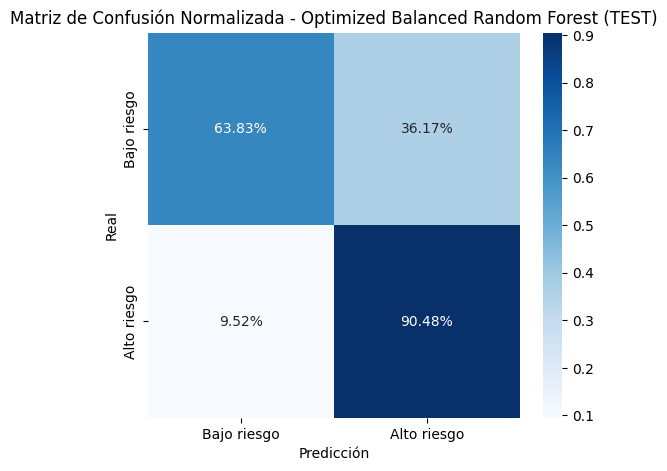

Optimized BalancedRandomForestClassifier trained, evaluated, and results stored.


In [76]:
modelo_brf_opt = BalancedRandomForestClassifier(
    **study_brf.best_params,
    random_state=42,
    sampling_strategy='auto',
    replacement=False
)
modelo_brf_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
brf_opt_metrics = evaluar_overfitting(
    modelo_brf_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Optimized Balanced Random Forest"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Balanced Random Forest", **brf_opt_metrics})

print("Optimized BalancedRandomForestClassifier trained, evaluated, and results stored.")

### **LOGISTIC REGRESSION**

In [77]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def objective_lr(trial):
    # Sugerir hiperparámetros para Logistic Regression
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'saga'])

    # Crear el modelo LogisticRegression
    model = LogisticRegression(
        C=C,
        solver=solver,
        class_weight='balanced',
        max_iter=2000, # Increased max_iter for convergence
        random_state=42
    )

    # Entrenar el modelo con los datos originales (class_weight='balanced' maneja el desbalance)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for LogisticRegression defined.")

Objective function for LogisticRegression defined.


In [ ]:
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=50, show_progress_bar=True)

print("\nBest trial for LogisticRegression:")
print(f"  Value: {study_lr.best_value:.4f}")
print("  Params: ")
for key, value in study_lr.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Logistic Regression =====
---- TRAIN ----
AUC: 0.8863
Recall: 0.8886
Precision: 0.2553
F1: 0.3966

---- TEST ----
AUC: 0.8663
Recall: 0.8667
Precision: 0.2446
F1: 0.3816

---- GAP (Train-Test) ----
AUC gap: 0.0200


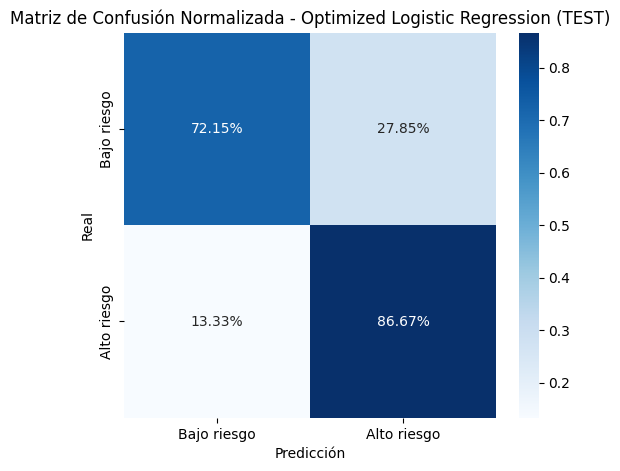

Optimized LogisticRegression trained, evaluated, and results stored.


In [79]:
modelo_lr_opt = LogisticRegression(
    **study_lr.best_params,
    class_weight='balanced',
    max_iter=2000,
    random_state=42
)
modelo_lr_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
lr_opt_metrics = evaluar_overfitting(
    modelo_lr_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Optimized Logistic Regression"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Logistic Regression", **lr_opt_metrics})

print("Optimized LogisticRegression trained, evaluated, and results stored.")

### **DECISION TREE**

In [80]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

def objective_dt(trial):
    # Sugerir hiperparámetros para DecisionTreeClassifier
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Crear el modelo DecisionTreeClassifier
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        class_weight='balanced', # Mantener el balanceo de clases
        random_state=42
    )

    # Entrenar el modelo con los datos originales (class_weight='balanced' maneja el desbalance)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for DecisionTreeClassifier defined.")

Objective function for DecisionTreeClassifier defined.


In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=50, show_progress_bar=True)

print("\nBest trial for DecisionTreeClassifier:")
print(f"  Value: {study_dt.best_value:.4f}")
print("  Params: ")
for key, value in study_dt.best_params.items():
    print(f"    {key}: {value}")


===== Optimized Decision Tree Classifier =====
---- TRAIN ----
AUC: 0.8203
Recall: 0.9289
Precision: 0.1998
F1: 0.3289

---- TEST ----
AUC: 0.7816
Recall: 0.8667
Precision: 0.1824
F1: 0.3013

---- GAP (Train-Test) ----
AUC gap: 0.0387


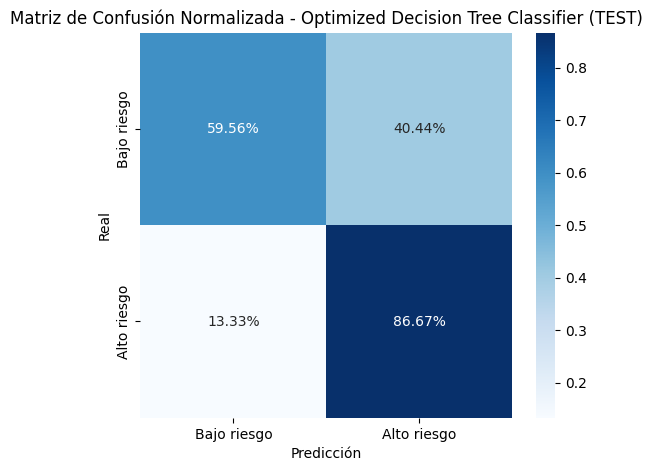

Optimized DecisionTreeClassifier trained, evaluated, and results stored.


In [82]:
modelo_dt_opt = DecisionTreeClassifier(
    **study_dt.best_params,
    random_state=42,
    class_weight='balanced'
)
modelo_dt_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
dt_opt_metrics = evaluar_overfitting(
    modelo_dt_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized Decision Tree Classifier"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized Decision Tree Classifier", **dt_opt_metrics})

print("Optimized DecisionTreeClassifier trained, evaluated, and results stored.")

### **SVM**

In [83]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

def objective_svm(trial):
    # Sugerir hiperparámetros para SVM con kernel lineal
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)

    # Crear el modelo SVC con kernel lineal
    model = SVC(
        kernel='linear',
        C=C,
        probability=True, # Necesario para predict_proba
        class_weight='balanced', # Mantener el balanceo de clases
        random_state=42
    )

    # Entrenar el modelo con los datos originales (class_weight='balanced' maneja el desbalance)
    model.fit(X_train, y_train)

    # Predecir probabilidades en el conjunto de prueba
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcular y devolver el AUC-ROC
    auc = roc_auc_score(y_test, y_pred_proba)
    return auc

print("Objective function for SVM Linear Kernel defined.")

Objective function for SVM Linear Kernel defined.


In [ ]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=50, show_progress_bar=True)

print("\nBest trial for SVM Linear Kernel:")
print(f"  Value: {study_svm.best_value:.4f}")
print("  Params: ")
for key, value in study_svm.best_params.items():
    print(f"    {key}: {value}")


===== Optimized SVM Linear Kernel =====
---- TRAIN ----
AUC: 0.8850
Recall: 0.3934
Precision: 0.4611
F1: 0.4246

---- TEST ----
AUC: 0.8648
Recall: 0.3619
Precision: 0.4578
F1: 0.4043

---- GAP (Train-Test) ----
AUC gap: 0.0202


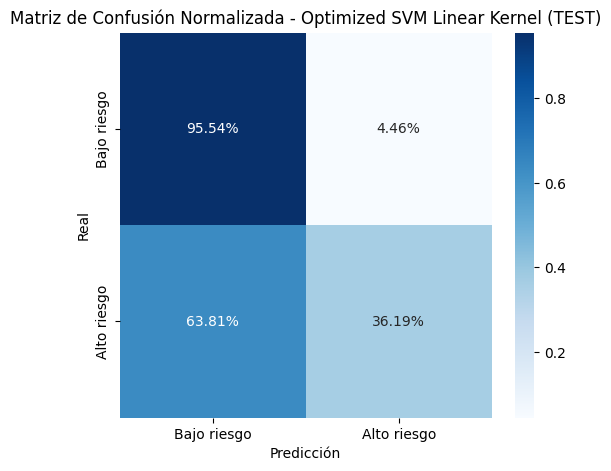

Optimized SVM Linear Kernel trained, evaluated, and results stored.


In [85]:
modelo_svm_opt = SVC(
    **study_svm.best_params,
    kernel='linear',
    probability=True,
    class_weight='balanced',
    random_state=42
)
modelo_svm_opt.fit(X_train, y_train)

# Evaluar el modelo optimizado
svm_opt_metrics = evaluar_overfitting(
    modelo_svm_opt,
    X_train, y_train,
    X_test, y_test,
    threshold=0.3,
    nombre="Optimized SVM Linear Kernel"
)

# Agregar las métricas a la lista de resultados
results.append({"Modelo": "Optimized SVM Linear Kernel", **svm_opt_metrics})

print("Optimized SVM Linear Kernel trained, evaluated, and results stored.")

### **RESULTADOS**

In [86]:
df_optimized_results = pd.DataFrame(results)

print("Summary of all model results (original and optimized):")
df_optimized_results

Summary of all model results (original and optimized):


,Modelo,auc_train,recall_train,precision_train,f1_train,auc_test,recall_test,precision_test,f1_test,auc_gap
0,Random Forest + SMOTE,0.959054,0.948909,0.680299,0.792461,0.851999,0.790476,0.259375,0.390588,0.107056
1,XGBoost,0.957805,0.960813,0.636752,0.765915,0.846571,0.838095,0.235294,0.367432,0.111234
2,CatBoost,0.980665,0.994544,0.631695,0.772640,0.850791,0.876190,0.223844,0.356589,0.129875
3,Balanced Random Forest,0.998499,1.000000,0.329173,0.495305,0.845278,0.809524,0.257576,0.390805,0.153220
4,Logistic Regression,0.885411,0.888626,0.253550,0.394529,0.865364,0.857143,0.242588,0.378151,0.020047
5,Decision Tree Classifier,0.889237,0.976303,0.217759,0.356093,0.758681,0.809524,0.177453,0.291096,0.130555
6,SVM Linear Kernel,0.884503,0.395735,0.461326,0.426020,0.864307,0.361905,0.457831,0.404255,0.020196
7,Optimized Random Forest + SMOTE,0.973023,0.960317,0.728367,0.828412,0.854340,0.780952,0.302583,0.436170,0.118684
8,Optimized XGBoost,0.970155,1.000000,0.333333,0.500000,0.849847,1.000000,0.094255,0.172272,0.120309
9,Optimized CatBoost,0.965002,0.967758,0.666325,0.789239,0.852895,0.819048,0.249275,0.382222,0.112107


<>:18: SyntaxWarning: invalid escape sequence '\+'
<>:18: SyntaxWarning: invalid escape sequence '\+'
/tmp/ipython-input-308357779.py:18: SyntaxWarning: invalid escape sequence '\+'
  df_optimized['Modelo_base'] = df_optimized['Modelo'].str.replace('Optimized ', '').str.replace(' \+ SMOTE', '')


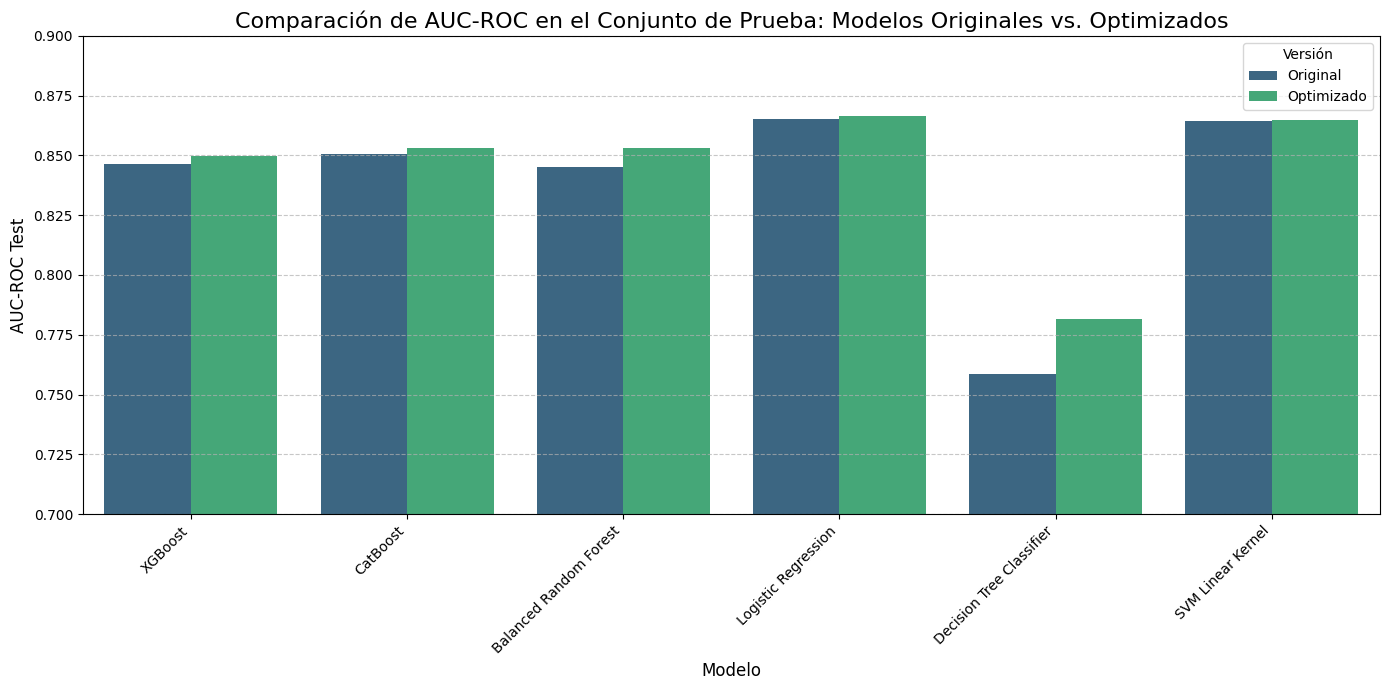

Bar chart comparing original and optimized model AUC-ROC scores generated.


In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los resultados originales de los optimizados
df_original = df_optimized_results[~df_optimized_results['Modelo'].str.contains('Optimized')].copy()
df_optimized = df_optimized_results[df_optimized_results['Modelo'].str.contains('Optimized')].copy()

# Crear una columna de nombre de modelo base para emparejar
df_original['Modelo_base'] = df_original['Modelo'].replace({
    'Random Forest + SMOTE': 'Random Forest',
    'XGBoost': 'XGBoost',
    'CatBoost': 'CatBoost',
    'Balanced Random Forest': 'Balanced Random Forest',
    'Logistic Regression': 'Logistic Regression',
    'Decision Tree Classifier': 'Decision Tree Classifier',
    'SVM Linear Kernel': 'SVM Linear Kernel'
})
df_optimized['Modelo_base'] = df_optimized['Modelo'].str.replace('Optimized ', '').str.replace(' \+ SMOTE', '')

# Unir los resultados por el nombre del modelo base
df_comparison = pd.merge(
    df_original[['Modelo_base', 'auc_test']],
    df_optimized[['Modelo_base', 'auc_test']],
    on='Modelo_base',
    suffixes=('_original', '_optimized')
)

# Preparar los datos para graficar
plot_data = df_comparison.melt(
    id_vars=['Modelo_base'],
    value_vars=['auc_test_original', 'auc_test_optimized'],
    var_name='Tipo de Modelo', value_name='AUC-ROC Test'
)

plot_data['Tipo de Modelo'] = plot_data['Tipo de Modelo'].replace({
    'auc_test_original': 'Original',
    'auc_test_optimized': 'Optimizado'
})

plt.figure(figsize=(14, 7))
sns.barplot(x='Modelo_base', y='AUC-ROC Test', hue='Tipo de Modelo', data=plot_data, palette='viridis')
plt.title('Comparación de AUC-ROC en el Conjunto de Prueba: Modelos Originales vs. Optimizados', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('AUC-ROC Test', fontsize=12)
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Versión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar chart comparing original and optimized model AUC-ROC scores generated.")

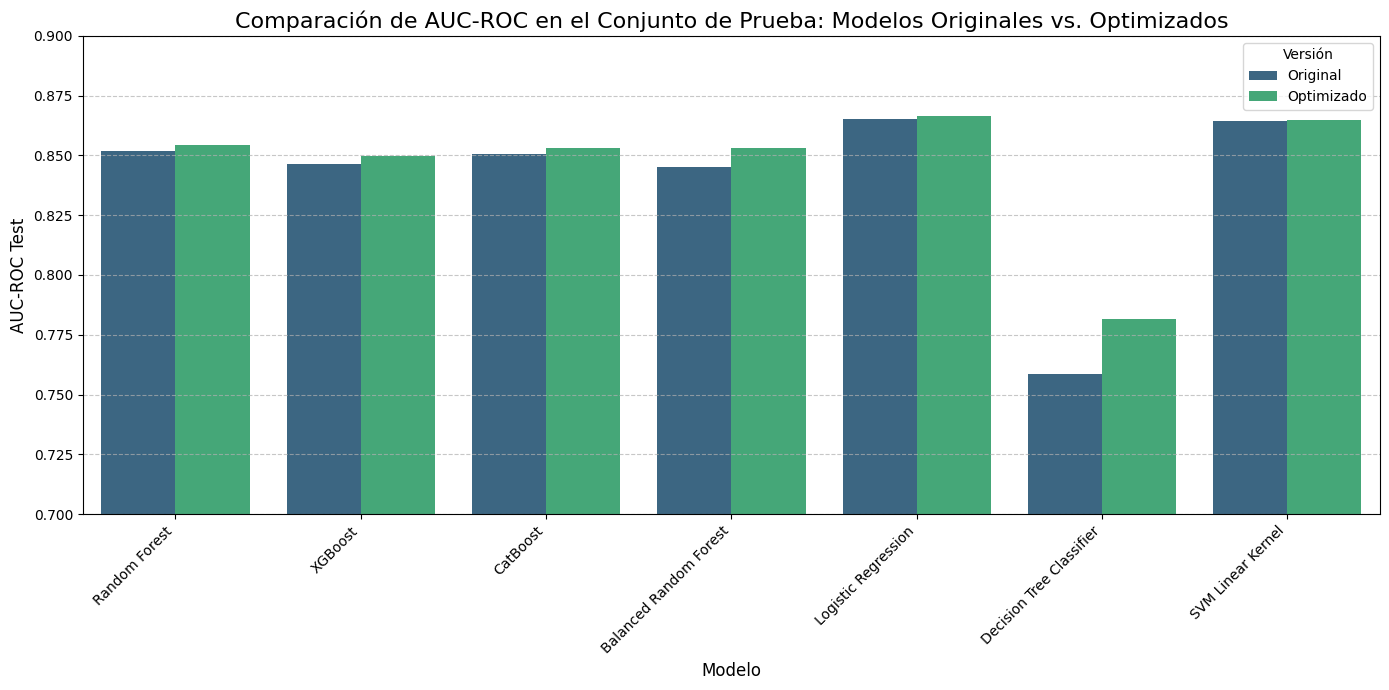

Bar chart comparing original and optimized model AUC-ROC scores generated.


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los resultados originales de los optimizados
df_original = df_optimized_results[~df_optimized_results['Modelo'].str.contains('Optimized')].copy()
df_optimized = df_optimized_results[df_optimized_results['Modelo'].str.contains('Optimized')].copy()

# Crear una columna de nombre de modelo base para emparejar
df_original['Modelo_base'] = df_original['Modelo'].replace({
    'Random Forest + SMOTE': 'Random Forest',
    'XGBoost': 'XGBoost',
    'CatBoost': 'CatBoost',
    'Balanced Random Forest': 'Balanced Random Forest',
    'Logistic Regression': 'Logistic Regression',
    'Decision Tree Classifier': 'Decision Tree Classifier',
    'SVM Linear Kernel': 'SVM Linear Kernel'
})
df_optimized['Modelo_base'] = df_optimized['Modelo'].str.replace('Optimized ', '').str.replace(' + SMOTE', '')

# Unir los resultados por el nombre del modelo base
df_comparison = pd.merge(
    df_original[['Modelo_base', 'auc_test']],
    df_optimized[['Modelo_base', 'auc_test']],
    on='Modelo_base',
    suffixes=('_original', '_optimized')
)

# Preparar los datos para graficar
plot_data = df_comparison.melt(
    id_vars=['Modelo_base'],
    value_vars=['auc_test_original', 'auc_test_optimized'],
    var_name='Tipo de Modelo', value_name='AUC-ROC Test'
)

plot_data['Tipo de Modelo'] = plot_data['Tipo de Modelo'].replace({
    'auc_test_original': 'Original',
    'auc_test_optimized': 'Optimizado'
})

plt.figure(figsize=(14, 7))
sns.barplot(x='Modelo_base', y='AUC-ROC Test', hue='Tipo de Modelo', data=plot_data, palette='viridis')
plt.title('Comparación de AUC-ROC en el Conjunto de Prueba: Modelos Originales vs. Optimizados', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('AUC-ROC Test', fontsize=12)
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Versión')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar chart comparing original and optimized model AUC-ROC scores generated.")